In [1]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr, bartlett, levene, wilcoxon, mannwhitneyu, ttest_ind, f_oneway, kruskal
from scipy.stats import shapiro, anderson, kstest, normaltest, jarque_bera
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
plt.rc("font", family="Malgun Gothic")

In [3]:
df = pd.read_csv(r'C:\Users\User\Desktop\DigitalHana_Project2\Data\HanaCard_Data.csv', encoding = 'cp949')
df.head()

,회원번호,남녀구분코드,연령,소지여부_신용,입회일자_신용,입회경과개월수_신용,탈회여부,회원여부_연체,수신거부여부_TM,수신거부여부_DM,...,캠페인접촉건수_R12M,캠페인접촉일수_R12M,캠페인접촉월수_R12M,접촉후경과월_R12M,보험콜대상월수_R12M,보험콜대상횟수_R12M,보험콜통화횟수_R12M,보험콜배정후경과월_R12M,보험콜통화후경과월_R12M,고객구분
0,YNtSN9Oa,2,64,1,20140709,54,1,0,0,0,...,3,3,2,5,5,5,9,0,0,21.Active_연속
1,Rijqdlzu,1,24,1,20170412,21,0,0,0,0,...,0,0,0,12,5,5,14,2,2,21.Active_연속
2,NOsf3TZS,2,43,1,20170426,21,1,0,1,0,...,0,0,0,12,0,0,0,12,12,21.Active_연속
3,7IPZGTZu,2,79,1,20141128,50,0,0,0,0,...,16,15,5,1,3,3,6,0,0,21.Active_연속
4,pEEsUF2u,2,82,1,20120905,76,0,0,0,0,...,4,4,3,1,1,1,4,3,2,21.Active_연속


In [4]:
df.shape
# 데이터 갯수 : 300000개
# Column 갯수 : 302개
# Key 데이터 : 회원번호, Target 데이터 : 탈회여부

(300000, 302)

In [5]:
# Column들 중에서 결측치가 1개라도 있는 Column들을 출력
df.columns[df.notna().all() == False]

Index(['직장시도명', '직장시군구명'], dtype='object')

In [6]:
# df의 Column들 중에서 값이 1개로만 되어있는 Column들을 출력
for column in df.columns:
    if len(df[column].unique()) == 1:
        print(df[column].value_counts())

0    300000
Name: 납부_렌탈료이용금액, dtype: int64
0    300000
Name: 컨택건수_CA_TM_B0M, dtype: int64
0    300000
Name: 컨택건수_CA_EM_B0M, dtype: int64
0    300000
Name: 컨택건수_리볼빙_EM_B0M, dtype: int64
0    300000
Name: 컨택건수_리볼빙_청구서_B0M, dtype: int64
0    300000
Name: 컨택건수_카드론_인터넷_B0M, dtype: int64
0    300000
Name: 컨택건수_CA_인터넷_B0M, dtype: int64
0    300000
Name: 컨택건수_리볼빙_인터넷_B0M, dtype: int64
0    300000
Name: 컨택건수_CA_EM_R6M, dtype: int64
0    300000
Name: 컨택건수_리볼빙_EM_R6M, dtype: int64
0    300000
Name: 컨택건수_리볼빙_청구서_R6M, dtype: int64
0    300000
Name: 컨택건수_카드론_인터넷_R6M, dtype: int64
0    300000
Name: 컨택건수_CA_인터넷_R6M, dtype: int64
0    300000
Name: 컨택건수_리볼빙_인터넷_R6M, dtype: int64


In [7]:
# Column들의 종류를 나누기
# '거주시도명', '거주시군구명', '직장시도명', '직장시군구명'의 경우는 비식별화 처리가 되어서 사용이 어렵기 때문에 제외
# 특이사항1 Column : '회원번호'(개인 구분용), '입회일자_신용'(날짜데이터)
# 특이사항2 Column : '납부_렌탈료이용금액', '컨택건수_CA_TM_B0M', '컨택건수_CA_EM_B0M', '컨택건수_리볼빙_EM_B0M', '컨택건수_리볼빙_청구서_B0M', '컨택건수_카드론_인터넷_B0M', '컨택건수_CA_인터넷_B0M', '컨택건수_리볼빙_인터넷_B0M', '컨택건수_CA_EM_R6M', '컨택건수_리볼빙_EM_R6M', '컨택건수_리볼빙_청구서_R6M', '컨택건수_카드론_인터넷_R6M', '컨택건수_CA_인터넷_R6M', '컨택건수_리볼빙_인터넷_R6M' -> 30만개 모든 값이 0
numeric_discrete = ['연령', '입회경과개월수_신용', '탈회횟수_누적', '탈회횟수_발급1년이내', '유효카드수_신용체크', '유효카드수_신용', '유효카드수_체크', '이용금액_R3M_신용체크', '이용금액_R3M_신용', '이용금액_R3M_체크', '_1순위카드이용금액', '_1순위카드이용건수', '기본연회비_B0M', '카드이용한도금액', '이용건수_신용_B0M', '이용건수_신판_B0M', '이용건수_일시불_B0M', '이용건수_할부_B0M', '이용건수_할부_유이자_B0M', '이용건수_할부_무이자_B0M', '이용건수_부분무이자_B0M', '이용건수_CA_B0M', '이용건수_체크_B0M', '이용건수_카드론_B0M', '이용금액_신용_B0M', '이용금액_신판_B0M', '이용금액_일시불_B0M', '이용금액_할부_B0M', '이용금액_할부_유이자_B0M', '이용금액_할부_무이자_B0M', '이용금액_부분무이자_B0M', '이용금액_CA_B0M', '이용금액_체크_B0M', '이용금액_카드론_B0M', '이용후경과월_신용', '이용후경과월_신판', '이용후경과월_일시불', '이용후경과월_할부', '이용후경과월_할부_유이자', '이용후경과월_할부_무이자', '이용후경과월_부분무이자', '이용후경과월_CA', '이용후경과월_체크', '이용후경과월_카드론', '이용건수_신용_R12M', '이용건수_신판_R12M', '이용건수_일시불_R12M', '이용건수_할부_R12M', '이용건수_할부_유이자_R12M', '이용건수_할부_무이자_R12M', '이용건수_부분무이자_R12M', '이용건수_CA_R12M', '이용건수_체크_R12M', '이용건수_카드론_R12M', '이용금액_신용_R12M', '이용금액_신판_R12M', '이용금액_일시불_R12M', '이용금액_할부_R12M', '이용금액_할부_유이자_R12M', '이용금액_할부_무이자_R12M', '이용금액_부분무이자_R12M', '이용금액_CA_R12M', '이용금액_체크_R12M', '이용금액_카드론_R12M', '이용개월수_신용_R12M', '이용개월수_신판_R12M', '이용개월수_일시불_R12M', '이용개월수_할부_R12M', '이용개월수_할부_유이자_R12M', '이용개월수_할부_무이자_R12M', '이용개월수_부분무이자_R12M', '이용개월수_CA_R12M', '이용개월수_체크_R12M', '이용개월수_카드론_R12M', '이용건수_신용_R6M', '이용건수_신판_R6M', '이용건수_일시불_R6M', '이용건수_할부_R6M', '이용건수_할부_유이자_R6M', '이용건수_할부_무이자_R6M', '이용건수_CA_R6M', '이용건수_체크_R6M', '이용건수_카드론_R6M', '이용금액_신용_R6M', '이용금액_신판_R6M', '이용금액_일시불_R6M', '이용금액_할부_R6M', '이용금액_할부_유이자_R6M', '이용금액_할부_무이자_R6M', '이용금액_부분무이자_R6M', '이용금액_CA_R6M', '이용금액_체크_R6M', '이용금액_카드론_R6M', '이용개월수_신용_R6M', '이용개월수_신판_R6M', '이용개월수_일시불_R6M', '이용개월수_할부_R6M', '이용개월수_할부_유이자_R6M', '이용개월수_할부_무이자_R6M', '이용개월수_부분무이자_R6M', '이용개월수_CA_R6M', '이용개월수_체크_R6M', '이용개월수_카드론_R6M', '이용건수_신용_R3M', '이용건수_신판_R3M', '이용건수_일시불_R3M', '이용건수_할부_R3M', '이용건수_할부_유이자_R3M', '이용건수_할부_무이자_R3M', '이용건수_부분무이자_R3M', '이용건수_CA_R3M', '이용건수_체크_R3M', '이용건수_카드론_R3M', '이용금액_신용_R3M', '이용금액_신판_R3M', '이용금액_일시불_R3M', '이용금액_할부_R3M', '이용금액_할부_유이자_R3M', '이용금액_할부_무이자_R3M', '이용금액_부분무이자_R3M', '이용금액_CA_R3M', '이용금액_체크_R3M', '이용금액_카드론_R3M', '이용개월수_신용_R3M', '이용개월수_신판_R3M', '이용개월수_일시불_R3M', '이용개월수_할부_R3M', '이용개월수_할부_유이자_R3M', '이용개월수_할부_무이자_R3M', '이용개월수_부분무이자_R3M', '이용개월수_CA_R3M', '이용개월수_체크_R3M', '이용개월수_카드론_R3M', '이용가맹점수', '이용금액_업종기준', '이용금액_쇼핑', '이용금액_요식', '이용금액_교통', '이용금액_의료', '이용금액_납부', '이용금액_교육', '이용금액_여유생활', '이용금액_사교활동', '이용금액_일상생활', '이용금액_해외', '쇼핑_도소매_이용금액', '쇼핑_백화점_이용금액', '쇼핑_마트_이용금액', '쇼핑_슈퍼마켓_이용금액', '쇼핑_편의점_이용금액', '쇼핑_아울렛_이용금액', '쇼핑_온라인_이용금액', '쇼핑_기타_이용금액', '쇼핑_전체_이용금액', '교통_주유이용금액', '교통_정비이용금액', '교통_통행료이용금액', '교통_버스지하철이용금액', '교통_택시이용금액', '교통_철도버스이용금액', '교통_전체이용금액', '여유_운동이용금액', '여유_Pet이용금액', '여유_공연이용금액', '여유_공원이용금액', '여유_숙박이용금액', '여유_여행이용금액', '여유_항공이용금액', '여유_기타이용금액', '여유_전체이용금액', '납부_통신비이용금액', '납부_관리비이용금액', '납부_가스전기료이용금액', '납부_보험료이용금액', '납부_유선방송이용금액', '납부_건강연금이용금액', '납부_기타이용금액', '납부_전체이용금액', '할부건수_3M_R12M', '할부건수_6M_R12M', '할부건수_12M_R12M', 'RP건수_B0M', 'RP금액_B0M', '증감_RP건수_전월', '증감_RP유형건수_전월', '이용개월수_온라인_R6M', '이용개월수_오프라인_R6M', '이용건수_오프라인_R6M', '이용건수_온라인_B0M', '이용건수_오프라인_B0M', '이용개월수_페이_온라인_R6M', '이용개월수_페이_오프라인_R6M', '이용금액_페이_온라인_R6M', '이용건수_페이_온라인_R6M', '이용건수_페이_오프라인_R6M', '이용건수_페이_오프라인_R3M', '이용건수_페이_온라인_B0M', '이용건수_페이_오프라인_B0M', '이용개월수_간편결제_R6M', '이용개월수_전체_R6M', '이용개월수_전체_R3M', '이용개월수_결제일_R6M', '청구금액_B0', '청구금액_R3M', '청구금액_R6M', '할인건수_R3M', '할인금액_R3M', '할인건수_B0M', '할인금액_B0M', '상환개월수_R12M', '상환개월수_결제일_R12M', '상환개월수_결제일_R6M', '상환개월수_결제일_R3M', '연체건수_R12M', '연체건수_R6M', '연체건수_R3M', '혜택수혜금액', '컨택건수_카드론_TM_B0M', '컨택건수_리볼빙_TM_B0M', '컨택건수_이용유도_TM_B0M', '컨택건수_신용발급_TM_B0M', '컨택건수_부대서비스_TM_B0M', '컨택건수_포인트소진_TM_B0M', '컨택건수_보험_TM_B0M', '컨택건수_카드론_LMS_B0M', '컨택건수_CA_LMS_B0M', '컨택건수_리볼빙_LMS_B0M', '컨택건수_이용유도_LMS_B0M', '컨택건수_카드론_EM_B0M', '컨택건수_이용유도_EM_B0M', '컨택건수_카드론_청구서_B0M', '컨택건수_CA_청구서_B0M', '컨택건수_이용유도_청구서_B0M', '컨택건수_이용유도_인터넷_B0M', '컨택건수_카드론_TM_R6M', '컨택건수_리볼빙_TM_R6M', '컨택건수_CA_TM_R6M', '컨택건수_이용유도_TM_R6M', '컨택건수_신용발급_TM_R6M', '컨택건수_부대서비스_TM_R6M', '컨택건수_포인트소진_TM_R6M', '컨택건수_보험_TM_R6M', '컨택건수_카드론_LMS_R6M', '컨택건수_CA_LMS_R6M', '컨택건수_리볼빙_LMS_R6M', '컨택건수_이용유도_LMS_R6M', '컨택건수_카드론_EM_R6M', '컨택건수_이용유도_EM_R6M', '컨택건수_카드론_청구서_R6M', '컨택건수_CA_청구서_R6M', '컨택건수_이용유도_청구서_R6M', '컨택건수_채권_B0M', '컨택건수_FDS_B0M', '컨택건수_채권_R6M', '컨택건수_FDS_R6M', '캠페인접촉건수_R12M', '캠페인접촉일수_R12M', '캠페인접촉월수_R12M', '접촉후경과월_R12M', '보험콜대상월수_R12M', '보험콜대상횟수_R12M', '보험콜통화횟수_R12M', '보험콜배정후경과월_R12M', '보험콜통화후경과월_R12M']
numeric_continuos = []
categorical_order = ['Life_Stage', '이용금액대']
categorical_nonorder = ['남녀구분코드', '소지여부_신용', '탈회여부', '회원여부_연체', '수신거부여부_TM', '수신거부여부_DM', '수신거부여부_메일', '수신거부여부_SMS', '자격기준', '자격구분상세', '연회비청구구분_B0M', 'BL여부_R12M', '마케팅동의여부', '_1순위카드ID', '_1순위신용체크구분', '고객구분']

In [8]:
# 활용할 수 없는 Column들을 삭제
df.drop(columns = ['거주시도명', '거주시군구명', '직장시도명', '직장시군구명', '납부_렌탈료이용금액', '컨택건수_CA_TM_B0M', '컨택건수_CA_EM_B0M', '컨택건수_리볼빙_EM_B0M', '컨택건수_리볼빙_청구서_B0M', '컨택건수_카드론_인터넷_B0M', '컨택건수_CA_인터넷_B0M', '컨택건수_리볼빙_인터넷_B0M', '컨택건수_CA_EM_R6M', '컨택건수_리볼빙_EM_R6M', '컨택건수_리볼빙_청구서_R6M', '컨택건수_카드론_인터넷_R6M', '컨택건수_CA_인터넷_R6M', '컨택건수_리볼빙_인터넷_R6M'], inplace = True)

In [9]:
df['Life_Stage'] = df['Life_Stage'].map(lambda x : int(x[0]))
df['이용금액대'] = df['이용금액대'].map(lambda x : {9 : 0, 5 : 1, 4 : 2, 3 : 3, 2 : 4, 1 : 5}[int(x[:2])])

# 1. 회원정보 

In [4]:
# Column : 회원번호
# 결측치 갯수 : 0개
# 자료형 : object

In [5]:
len(df['회원번호'].unique())
# -> 300000개의 모든 데이터는 모두 서로 다른 개인에 대한 데이터임을 나타냄

300000

In [6]:
# Column : 남녀구분코드
# 1 = 남자, 2 = 여자
# 결측치 갯수 : 0개
# 자료형 : int

In [7]:
df['남녀구분코드'].unique()
# -> 여자, 남자 외의 다른 값은 없음

array([2, 1], dtype=int64)

In [8]:
# Column : 연령
# 결측치 갯수 : 0개
# 자료형 : int

In [10]:
df['연령'].describe()
# -> 최솟값은 19, 최댓값은 98이며 평균값, 중앙값은 각각 46.212110, 46

count    300000.000000
mean         46.212110
std          12.087588
min          19.000000
25%          37.000000
50%          46.000000
75%          54.000000
max          98.000000
Name: 연령, dtype: float64

In [11]:
# Column : 소지여부_신용
# 0 = 미소지, 1 = 소지
# 결측치 갯수 : 0개
# 자료형 : int

In [12]:
df['소지여부_신용'].unique()
# -> 소지, 미소지 외에 다른 값은 없음

array([1, 0], dtype=int64)

In [13]:
# Column : 입회일자_신용
# 설명 : 날짜를 8자리 정수로 나타냄
# 결측치 갯수 : 0개
# 자료형 : int

In [17]:
# 입회일자_신용에서 pd.to_datetime의 변환이 실패한 데이터들
df.loc[pd.to_datetime(df['입회일자_신용'], errors = 'coerce', format = "%Y%m%d").isna(), ['회원번호', '입회일자_신용']]
# -> 1개의 데이터(10101)가 날짜 변환에 실패

,회원번호,입회일자_신용
27132,XsAf4XtA,10101


In [ ]:
# 입회일자_신용에서 pd.to_datetime을 %Y%m%d형태로 format하는데 에러가 나오면은 pd.NaT로 바꾸기
df['입회일자_신용'] = pd.to_datetime(df['입회일자_신용'], errors = 'coerce', format = "%Y%m%d")

In [18]:
# 가장 오래된 날짜와 가장 최근 날짜를 확인
print(f"가장 오래된 날짜 : {df['입회일자_신용'].min()}, 가장 최근 날짜 : {df['입회일자_신용'].max()}")

가장 오래된 날짜 : 1982-02-16 00:00:00, 가장 최근 날짜 : 2018-06-29 00:00:00


In [19]:
# Column : 입회경과개월수_신용
# 결측치 갯수 : 0개
# 자료형 : int

In [20]:
df['입회경과개월수_신용'].describe()
# -> 최솟값은 0, 최댓값은 443이며 평균값, 중앙값은 각각 83, 60

count    300000.00000
mean         83.97931
std          77.67084
min           0.00000
25%          23.00000
50%          60.00000
75%         120.00000
max         443.00000
Name: 입회경과개월수_신용, dtype: float64

In [21]:
# Column : 탈회여부
# 0 = 유지, 1 = 탈퇴
# 결측치 갯수 : 0개
# 자료형 : int
# 탈회여부 확인 결과, 유지한 사람의 수는 178046(0.593487), 탈퇴한 사람의 수는 121954(0.406513)

In [28]:
# 탈회여부의 갯수와 비율
print(df['탈회여부'].value_counts())
print(df['탈회여부'].value_counts(normalize = True))

0    178046
1    121954
Name: 탈회여부, dtype: int64
0    0.593487
1    0.406513
Name: 탈회여부, dtype: float64


In [22]:
df['탈회여부'].unique()
# -> 탈퇴, 유지 외에 다른 값은 없음

array([1, 0], dtype=int64)

In [29]:
df.loc[(df['탈회여부'] == 0) & (df['탈회횟수_누적'] > 0)]

,회원번호,남녀구분코드,연령,소지여부_신용,입회일자_신용,입회경과개월수_신용,탈회여부,회원여부_연체,수신거부여부_TM,수신거부여부_DM,...,캠페인접촉건수_R12M,캠페인접촉일수_R12M,캠페인접촉월수_R12M,접촉후경과월_R12M,보험콜대상월수_R12M,보험콜대상횟수_R12M,보험콜통화횟수_R12M,보험콜배정후경과월_R12M,보험콜통화후경과월_R12M,고객구분


In [21]:
# Column : 회원여부_연체
# 0 = 미연체, 1 = 연체
# 결측치 갯수 : 0개
# 자료형 : int

In [22]:
df['회원여부_연체'].unique()
# -> 미연체, 연체 외에 다른 값은 없음

array([0, 1], dtype=int64)

In [23]:
# Column : 수신거부여부_TM
# 0 = 승인, 1 = 거부
# 결측치 갯수 : 0개
# 자료형 : int

In [24]:
df['수신거부여부_TM'].unique()
# -> 승인, 거부 외에 다른 값은 없음

array([0, 1], dtype=int64)

In [25]:
# Column : 수신거부여부_DM
# 0 = 승인, 1 = 거부
# 결측치 갯수 : 0개
# 자료형 : int

In [26]:
df['수신거부여부_DM'].unique()
# -> 승인, 거부 외에 다른 값은 없음

array([0, 1], dtype=int64)

In [27]:
# Column : 수신거부여부_메일
# 0 = 승인, 1 = 거부
# 결측치 갯수 : 0개
# 자료형 : int

In [28]:
df['수신거부여부_메일'].unique()
# -> 승인, 거부 외에 다른 값은 없음

array([0, 1], dtype=int64)

In [29]:
# Column : 수신거부여부_SMS
# 0 = 승인, 1 = 거부
# 결측치 갯수 : 0개
# 자료형 : int

In [30]:
df['수신거부여부_SMS'].unique()
# -> 승인, 거부 외에 다른 값은 없음

array([0, 1], dtype=int64)

In [31]:
# Column : 자격기준
# 값들 설명
# '01.공무원',
# '02.교육기관',
# '03.금융기관',
# '04.의료기관',
# '05.언론기관',
# '06.기업체',
# '07.소기업',
# '08.은행거래',
# '09.전문직',
# '10.배우자',
# '11.자영업자',
# '12.체크전환',
# '99.기타'
# 결측치 갯수 : 0개
# 자료형 : object

In [32]:
# 자격기준 column에 있는 고유값들을 번호 순서대로 확인
sorted(list(df['자격기준'].unique()), key = lambda x : int(x[:2]))

['01.공무원',
 '02.교육기관',
 '03.금융기관',
 '04.의료기관',
 '05.언론기관',
 '06.기업체',
 '07.소기업',
 '08.은행거래',
 '09.전문직',
 '10.배우자',
 '11.자영업자',
 '12.체크전환',
 '99.기타']

In [33]:
# Column : 자격구분상세
# 값들 설명
# '00.SK제휴사',
# '00.하나카드및관계사',
# '01.공무원_일반',
# '01.공무원_정부투자공공기관',
# '01.공무원_군인',
# '02.교육기관_학교법인직원',
# '02.교육기관_학원강사',
# '02.교육기관_초중고교사',
# '02.교육기관_유치원어린이집',
# '02.교육기관_학술연구단체',
# '02.교육기관_대학교교원',
# '03.금융기관_여신전문금융기관',
# '03.금융기관_은행증권보험은행연합회',
# '03.금융기관_금고저축은행신협상호금융',
# '03.금융기관',
# '04.의료기관_의사약사한의사',
# '04.의료기관_의료관련면허소시자',
# '04.의료기관',
# '05.언론기관',
# '06.기업체_30대그룹계열사및상장법인',
# '06.기업체_개인사업체임의단체연소득2.4천이상',
# '06.기업체_납입자본금3억이상중소기업',
# '06.기업체_납입자본금3억미만중소기업',
# '06.기업체_코스닥등록기업',
# '06.기업체',
# '07.소기업',
# '08.은행거래_수신평잔',
# '08.은행거래_신용대출',
# '08.은행거래_부동산담보대출',
# '08.은행거래_급여이체',
# '08.은행거래_하나대투거래',
# '08.은행거래_수신평잔3천이상',
# '08.은행거래',
# '08.은행거래_하나저축은행거래',
# '09.전문직_손해사정인법무사노무사통역사행정사보험계리',
# '09.전문직',
# '09.전문직_공인회계사기술사건축사세무사',
# '09.전문직_변호사변리사',
# '10.부동산보유',
# '11.배우자',
# '12.자영업자',
# '13.체크전환',
# '14.사업소득',
# '99.기타'
# 결측치 갯수 : 0개
# 자료형 : object

In [34]:
# 자격구분상세 column에 있는 고유값들을 번호 순서대로 확인
sorted(list(df['자격구분상세'].unique()), key = lambda x : int(x[:2]))

['00.SK제휴사',
 '00.하나카드및관계사',
 '01.공무원_일반',
 '01.공무원_정부투자공공기관',
 '01.공무원_군인',
 '02.교육기관_학교법인직원',
 '02.교육기관_학원강사',
 '02.교육기관_초중고교사',
 '02.교육기관_유치원어린이집',
 '02.교육기관_학술연구단체',
 '02.교육기관_대학교교원',
 '03.금융기관_여신전문금융기관',
 '03.금융기관_은행증권보험은행연합회',
 '03.금융기관_금고저축은행신협상호금융',
 '03.금융기관',
 '04.의료기관_의사약사한의사',
 '04.의료기관_의료관련면허소시자',
 '04.의료기관',
 '05.언론기관',
 '06.기업체_30대그룹계열사및상장법인',
 '06.기업체_개인사업체임의단체연소득2.4천이상',
 '06.기업체_납입자본금3억이상중소기업',
 '06.기업체_납입자본금3억미만중소기업',
 '06.기업체_코스닥등록기업',
 '06.기업체',
 '07.소기업',
 '08.은행거래_수신평잔',
 '08.은행거래_신용대출',
 '08.은행거래_부동산담보대출',
 '08.은행거래_급여이체',
 '08.은행거래_하나대투거래',
 '08.은행거래_수신평잔3천이상',
 '08.은행거래',
 '08.은행거래_하나저축은행거래',
 '09.전문직_손해사정인법무사노무사통역사행정사보험계리',
 '09.전문직',
 '09.전문직_공인회계사기술사건축사세무사',
 '09.전문직_변호사변리사',
 '10.부동산보유',
 '11.배우자',
 '12.자영업자',
 '13.체크전환',
 '14.사업소득',
 '99.기타']

In [35]:
# Column : 연회비청구구분_B0M
# 1 = 정상청구, 2 = 할인청구, 3 = 면제, 4 = 미청구
# 결측치 갯수 : 0개
# 자료형 : object

In [36]:
# 연회비청구구분_B0M column에 있는 고유값들을 번호 순서대로 확인
sorted(list(df['연회비청구구분_B0M'].unique()), key = lambda x : int(x[0]))

['1.정상청구', '2.할인청구', '3.면제', '4.미청구']

In [37]:
# Column : BL여부_R12M
# 설명 : BlackList 여부
# 0 = 미등록, 1 = 등록
# 결측치 갯수 : 0개
# 자료형 : int

In [38]:
df['BL여부_R12M'].unique()
# -> 미등록, 등록 외에 다른 값은 없음

array([0, 1], dtype=int64)

In [39]:
# Column : 탈회횟수_누적
# 결측치 갯수 : 0개
# 자료형 : int

In [40]:
df['탈회횟수_누적'].describe()
# -> 최솟값은 0, 최댓값은 11이며 평균값, 중앙값은 각각 0.516933, 0

count    281928.000000
mean          0.516933
std           0.719192
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max          11.000000
Name: 탈회횟수_누적, dtype: float64

In [41]:
# Column : 탈회횟수_발급1년이내
# 결측치 갯수 : 0개
# 자료형 : int

In [42]:
df['탈회횟수_발급1년이내'].describe()
# -> 최솟값은 0, 최댓값은 11이며 평균값, 중앙값은 각각 0.073994, 0

count    281928.000000
mean          0.073994
std           0.311166
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          11.000000
Name: 탈회횟수_발급1년이내, dtype: float64

In [43]:
# Column : 거주시도명
# 목록 : '경남', '서울', '경기', '광주', '부산', '충남', '강원', '제주', '대구', '대전', '인천', '전북', '울산', '경북', '전남', '충북'
# 결측치 갯수 : 0개
# 자료형 : object

In [44]:
# 거주시도명 column의 고유값 확인하기
df['거주시도명'].unique()

array(['경남', '서울', '경기', '광주', '부산', '충남', '강원', '제주', '대구', '대전', '인천',
       '전북', '울산', '경북', '전남', '충북'], dtype=object)

In [45]:
# Columb : 거주시군구명
# 210개의 거주시군구명이 있음
# 결측치 갯수 : 0개
# 자료형 : object

In [46]:
# 거주시군구명의 갯수
len(df['거주시군구명'].unique())

210

In [47]:
# Columb : 직장시도명
# 목록 : '서울', '경기', '대전', '대구', '전북', '광주', '경북', '전남', '충북', '인천', '경남', '제주', '충남', '부산', '강원', '울산', '세종'
# 17개의 직장시도명이 있음
# 결측치 갯수 : 52306개
# 자료형 : object

In [48]:
# 직장시도명 Column의 결측치 갯수
df['직장시도명'].isna().sum()

52306

In [49]:
# 직장시도명 Column에서 고유값들 확인
df['직장시도명'].dropna().unique()

array(['서울', '경기', '대전', '대구', '전북', '광주', '경북', '전남', '충북', '인천', '경남',
       '제주', '충남', '부산', '강원', '울산', '세종'], dtype=object)

In [50]:
# Columb : 직장시군구명
# 209개의 직장시군구명이 있음
# 결측치 갯수 : 52700개
# 자료형 : object

In [51]:
# 직장시군구명 Column의 결측치 갯수
df['직장시군구명'].isna().sum()

52700

In [52]:
# 직장시군구명의 갯수
len(df['직장시군구명'].dropna().unique())

209

In [53]:
# Column : 마케팅동의여부
# 0 = 미동의, 1 = 동의
# 결측치 갯수 : 0개
# 자료형 : int

In [54]:
df['마케팅동의여부'].unique()
# -> 동의, 미동의 외에 다른 값은 없음

array([1, 0], dtype=int64)

In [55]:
# Column : 유효카드수_신용체크
# 결측치 갯수 : 0개
# 자료형 : int

In [56]:
df['유효카드수_신용체크'].describe()
# -> 최솟값은 19, 최댓값은 37이며 평균값, 중앙값은 각각 2.180096, 2

count    281928.000000
mean          2.180096
std           1.406941
min           1.000000
25%           1.000000
50%           2.000000
75%           3.000000
max          37.000000
Name: 유효카드수_신용체크, dtype: float64

In [57]:
# Column : 유효카드수_신용
# 결측치 갯수 : 0개
# 자료형 : int

In [58]:
df['유효카드수_신용'].describe()
# -> 최솟값은 0, 최댓값은 32이며 평균값, 중앙값은 각각 1.556039, 1

count    281928.000000
mean          1.556039
std           0.984521
min           0.000000
25%           1.000000
50%           1.000000
75%           2.000000
max          32.000000
Name: 유효카드수_신용, dtype: float64

In [59]:
# Column : 유효카드수_체크
# 결측치 갯수 : 0개
# 자료형 : int

In [60]:
df['유효카드수_체크'].describe()
# -> 최솟값은 0, 최댓값은 18며 평균값, 중앙값은 각각 0.624056, 0

count    281928.000000
mean          0.624056
std           0.930889
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max          18.000000
Name: 유효카드수_체크, dtype: float64

In [61]:
# Column : 이용금액_R3M_신용체크
# 설명 : 음수가 무엇을 의미하는지 모르겠음
# 결측치 갯수 : 0개
# 자료형 : int

In [62]:
# 이용금액_R3M_신용체크 Column에서 값이 음수인 데이터들
df[df['이용금액_R3M_신용체크'] < 0]
# -> 334개의 데이터가 있음

,회원번호,남녀구분코드,연령,소지여부_신용,입회일자_신용,입회경과개월수_신용,탈회여부,회원여부_연체,수신거부여부_TM,수신거부여부_DM,...,캠페인접촉일수_R12M,캠페인접촉월수_R12M,접촉후경과월_R12M,보험콜대상월수_R12M,보험콜대상횟수_R12M,보험콜통화횟수_R12M,보험콜배정후경과월_R12M,보험콜통화후경과월_R12M,고객구분,가명처리_1순위카드명
29,OvevYQ6x,2,34,1,2013-03-28,70,0,0,1,1,...,0,0,12,0,0,0,12,12,22.Active_간헐,1085
968,GjFdAzNv,1,38,1,2010-11-03,98,0,0,0,0,...,21,7,0,1,1,1,6,5,22.Active_간헐,405
1089,4lWvVWoo,1,41,1,2014-03-25,58,0,0,1,1,...,0,0,12,0,0,0,12,12,21.Active_연속,3222
1122,tPfkyM8a,1,38,1,2008-05-27,128,0,0,0,0,...,1,1,2,0,0,0,12,12,22.Active_간헐,2054
2953,Wfe6iUAw,1,43,1,2013-04-18,69,0,1,0,0,...,2,2,4,1,1,0,4,12,31.휴면_3M,158
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279663,g3KzyzJw,1,56,1,2000-07-10,222,0,0,1,1,...,0,0,12,0,0,0,12,12,21.Active_연속,9097
281262,T0J490td,1,40,1,2014-09-03,52,0,0,0,0,...,19,8,1,1,1,0,7,12,22.Active_간헐,769
281291,8DjHY4XN,1,35,1,2000-07-15,222,0,0,1,1,...,0,0,12,0,0,0,12,12,22.Active_간헐,1876
281353,XsvJKSOy,1,39,1,2011-05-02,92,0,0,0,0,...,0,0,12,0,0,0,12,12,31.휴면_3M,18737


In [63]:
# Column : 이용금액_R3M_신용
# 설명 : 음수가 무엇을 의미하는지 모르겠음
# 결측치 갯수 : 0개
# 자료형 : int

In [64]:
# 이용금액_R3M_신용 Column에서 값이 음수인 데이터들
df[df['이용금액_R3M_신용'] < 0]
# -> 338개의 데이터가 있음

,회원번호,남녀구분코드,연령,소지여부_신용,입회일자_신용,입회경과개월수_신용,탈회여부,회원여부_연체,수신거부여부_TM,수신거부여부_DM,...,캠페인접촉일수_R12M,캠페인접촉월수_R12M,접촉후경과월_R12M,보험콜대상월수_R12M,보험콜대상횟수_R12M,보험콜통화횟수_R12M,보험콜배정후경과월_R12M,보험콜통화후경과월_R12M,고객구분,가명처리_1순위카드명
29,OvevYQ6x,2,34,1,2013-03-28,70,0,0,1,1,...,0,0,12,0,0,0,12,12,22.Active_간헐,1085
968,GjFdAzNv,1,38,1,2010-11-03,98,0,0,0,0,...,21,7,0,1,1,1,6,5,22.Active_간헐,405
1089,4lWvVWoo,1,41,1,2014-03-25,58,0,0,1,1,...,0,0,12,0,0,0,12,12,21.Active_연속,3222
1122,tPfkyM8a,1,38,1,2008-05-27,128,0,0,0,0,...,1,1,2,0,0,0,12,12,22.Active_간헐,2054
2953,Wfe6iUAw,1,43,1,2013-04-18,69,0,1,0,0,...,2,2,4,1,1,0,4,12,31.휴면_3M,158
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279663,g3KzyzJw,1,56,1,2000-07-10,222,0,0,1,1,...,0,0,12,0,0,0,12,12,21.Active_연속,9097
281262,T0J490td,1,40,1,2014-09-03,52,0,0,0,0,...,19,8,1,1,1,0,7,12,22.Active_간헐,769
281291,8DjHY4XN,1,35,1,2000-07-15,222,0,0,1,1,...,0,0,12,0,0,0,12,12,22.Active_간헐,1876
281353,XsvJKSOy,1,39,1,2011-05-02,92,0,0,0,0,...,0,0,12,0,0,0,12,12,31.휴면_3M,18737


In [65]:
# Column : 이용금액_R3M_체크
# 설명 : 음수가 무엇을 의미하는지 모르겠음
# 결측치 갯수 : 0개
# 자료형 : int

In [66]:
# 이용금액_R3M_체크 Column에서 값이 음수인 데이터들
df[df['이용금액_R3M_체크'] < 0]
# -> 77개의 데이터가 있음

,회원번호,남녀구분코드,연령,소지여부_신용,입회일자_신용,입회경과개월수_신용,탈회여부,회원여부_연체,수신거부여부_TM,수신거부여부_DM,...,캠페인접촉일수_R12M,캠페인접촉월수_R12M,접촉후경과월_R12M,보험콜대상월수_R12M,보험콜대상횟수_R12M,보험콜통화횟수_R12M,보험콜배정후경과월_R12M,보험콜통화후경과월_R12M,고객구분,가명처리_1순위카드명
1565,yJR1DiBR,2,42,1,2011-06-03,91,0,0,0,0,...,11,5,0,0,0,0,12,12,21.Active_연속,9769
3783,J8PwVjzZ,1,68,1,2015-12-18,37,0,0,0,0,...,2,1,9,1,1,3,1,1,21.Active_연속,7931
5460,L8JzeL6y,1,26,1,2017-06-09,19,0,0,1,1,...,0,0,12,0,0,0,12,12,21.Active_연속,1133
8457,TRmCyXT1,2,54,1,2014-04-22,57,0,0,0,0,...,5,4,4,0,0,0,12,12,21.Active_연속,2637
11990,Sxq9cG43,2,49,1,1987-04-09,381,0,0,0,0,...,0,0,12,2,2,5,1,1,21.Active_연속,879
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271597,4lnGDR4C,2,52,1,2013-11-08,62,0,0,1,1,...,1,1,7,0,0,0,12,12,34.휴면_9M+,909
273986,CpLVFCxD,1,39,1,2012-11-28,74,0,0,1,1,...,0,0,12,0,0,0,12,12,21.Active_연속,9097
275842,MBUvTz8l,1,28,1,2011-11-18,86,0,0,1,1,...,1,1,8,0,0,0,12,12,21.Active_연속,5835
277911,lDtf3scz,1,72,1,2017-04-06,21,0,0,1,1,...,0,0,12,0,0,0,12,12,21.Active_연속,8514


In [67]:
# Column : 가명처리_1순위카드명
# 설명 : 데이터는 정수형이지만 카드명을 가명처리 한 것이기 때문에 순서가 없는 범주형으로 다뤄야 한다 생각
# 결측치 갯수 : 0개
# 자료형 : int(예측 : 범주형)

In [68]:
len(df['가명처리_1순위카드명'].unique())
# -> 총 221개의 고유값이 존재

221

In [69]:
# Column : _1순위카드이용금액
# 설명 : 음수가 무엇을 의미하는지 모르겠음
# 결측치 갯수 : 0개
# 자료형 : int

In [70]:
# _1순위카드이용금액 Column에서 값이 음수인 데이터들
df[df['_1순위카드이용금액'] < 0]
# -> 143개의 데이터가 있음

,회원번호,남녀구분코드,연령,소지여부_신용,입회일자_신용,입회경과개월수_신용,탈회여부,회원여부_연체,수신거부여부_TM,수신거부여부_DM,...,캠페인접촉일수_R12M,캠페인접촉월수_R12M,접촉후경과월_R12M,보험콜대상월수_R12M,보험콜대상횟수_R12M,보험콜통화횟수_R12M,보험콜배정후경과월_R12M,보험콜통화후경과월_R12M,고객구분,가명처리_1순위카드명
8564,GVJ4awOu,2,58,1,2017-10-24,15,0,0,1,1,...,4,2,10,0,0,0,12,12,21.Active_연속,715
12408,j8PpBqcc,1,65,1,2016-12-09,25,0,0,1,1,...,0,0,12,0,0,0,12,12,22.Active_간헐,2274
14100,hxtNL4B1,1,51,1,2009-02-16,119,0,0,0,0,...,2,2,6,5,5,10,2,1,22.Active_간헐,5835
16564,P1JVJZ6t,1,46,1,2015-05-21,44,0,0,0,0,...,1,1,0,3,3,13,6,6,22.Active_간헐,146
19675,YvnJG2gm,2,38,1,2007-10-31,134,0,0,0,0,...,3,3,2,0,0,0,12,12,22.Active_간헐,9097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
277891,UEEnhQlD,1,43,1,2017-04-21,21,0,0,0,0,...,18,10,0,0,0,0,12,12,31.휴면_3M,8514
279151,ECfmjenH,1,49,1,2013-06-03,67,0,0,0,1,...,4,3,9,0,0,0,12,12,22.Active_간헐,377
279663,g3KzyzJw,1,56,1,2000-07-10,222,0,0,1,1,...,0,0,12,0,0,0,12,12,21.Active_연속,9097
281291,8DjHY4XN,1,35,1,2000-07-15,222,0,0,1,1,...,0,0,12,0,0,0,12,12,22.Active_간헐,1876


In [71]:
# Column : _1순위카드이용건수
# 설명 : 음수가 무엇을 의미하는지 모르겠음
# 결측치 갯수 : 0개
# 자료형 : int

In [72]:
# _1순위카드이용건수 Column에서 값이 음수인 데이터들
df[df['_1순위카드이용건수'] < 0]
# -> 55개의 데이터가 있음

,회원번호,남녀구분코드,연령,소지여부_신용,입회일자_신용,입회경과개월수_신용,탈회여부,회원여부_연체,수신거부여부_TM,수신거부여부_DM,...,캠페인접촉일수_R12M,캠페인접촉월수_R12M,접촉후경과월_R12M,보험콜대상월수_R12M,보험콜대상횟수_R12M,보험콜통화횟수_R12M,보험콜배정후경과월_R12M,보험콜통화후경과월_R12M,고객구분,가명처리_1순위카드명
12768,dofEh7Pk,1,54,1,2017-03-27,22,0,0,0,0,...,0,0,12,2,2,2,1,1,22.Active_간헐,9769
18377,QDJv8IjR,1,51,1,2012-11-20,74,0,0,0,0,...,19,6,2,3,3,5,1,1,21.Active_연속,2679
19921,B0xTnDCC,2,37,1,2013-08-16,65,0,0,1,1,...,0,0,12,0,0,0,12,12,22.Active_간헐,2274
31587,iBZnwwBM,1,41,1,2018-03-21,10,0,0,0,0,...,8,5,1,1,1,4,5,4,32.휴면_6M-,5645
38633,w3JpYOM7,2,61,1,2010-03-30,106,0,0,1,1,...,0,0,12,0,0,0,12,12,22.Active_간헐,3093
40047,ljw7OO5M,2,62,1,2015-08-19,41,0,0,0,0,...,0,0,12,0,0,0,12,12,22.Active_간헐,18737
79936,9QGiPoee,2,44,1,2017-01-09,24,0,0,1,1,...,0,0,12,0,0,0,12,12,32.휴면_6M-,2637
80932,PT5kjwzA,2,66,1,2014-07-22,54,0,0,0,0,...,4,3,2,1,1,1,0,0,21.Active_연속,18737
82237,EHdxdDSL,2,53,1,2016-02-25,35,0,0,1,1,...,0,0,12,1,1,0,11,12,21.Active_연속,7931
83215,RidCWEEO,1,26,1,2016-08-03,29,0,0,0,0,...,16,7,0,2,2,5,2,1,31.휴면_3M,8514


In [73]:
# Column : _1순위신용체크구분
# 결측치 갯수 : 0개
# 자료형 : object

In [74]:
df['_1순위신용체크구분'].unique()
# -> 신용, 체크 외에 다른 값은 없음

array(['신용', '체크'], dtype=object)

In [75]:
# Column : 기본연회비_B0M
# 결측치 갯수 : 0개
# 자료형 : int

In [76]:
df['기본연회비_B0M'].describe()
# -> 최솟값은 0, 최댓값은 200000이며 평균값, 중앙값은 각각 806.716608, 0

count    281928.000000
mean        806.716608
std        4262.674900
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max      200000.000000
Name: 기본연회비_B0M, dtype: float64

In [77]:
# Column : Life_Stage
# 목록 : '1.Single', '2.가족형성기', '3.자녀출산기', '4.자녀성장기(1)', '5.자녀성장기(2)', '6.자녀출가기', '7.노령'
# 결측치 갯수 : 0개
# 자료형 : object

In [78]:
# Life_Stage column에 있는 고유값들을 번호 순서대로 확인
sorted(list(df['Life_Stage'].unique()), key = lambda x : int(x[0]))

['1.Single',
 '2.가족형성기',
 '3.자녀출산기',
 '4.자녀성장기(1)',
 '5.자녀성장기(2)',
 '6.자녀출가기',
 '7.노령']

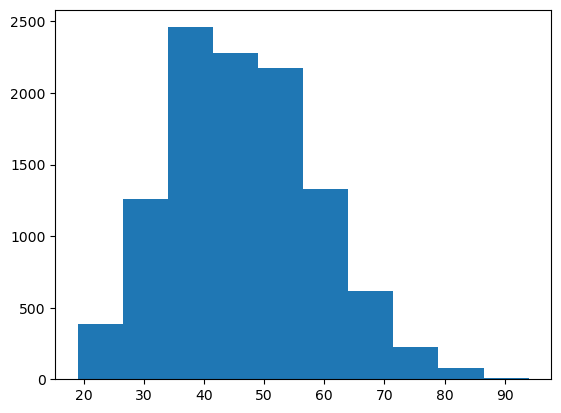

In [23]:
plt.hist(df.loc[df['Life_Stage'] == '1.Single', '연령'])
plt.show()

In [79]:
# Column : 카드이용한도금액
# 결측치 갯수 : 0개
# 자료형 : int

In [80]:
df['카드이용한도금액'].describe()
# -> 최솟값은 0, 최댓값은 390000000이며 평균값, 중앙값은 각각 5222346, 4300000

count    2.819280e+05
mean     5.222346e+06
std      4.906619e+06
min      0.000000e+00
25%      1.800000e+06
50%      4.300000e+06
75%      7.200000e+06
max      3.900000e+08
Name: 카드이용한도금액, dtype: float64

In [81]:
# Column : 고객구분
# 목록 : '21.Active_연속', '22.Active_간헐', '31.휴면_3M', '32.휴면_6M-', '33.휴면_9M-', '34.휴면_9M+'
# 결측치 갯수 : 0개
# 자료형 : object

In [82]:
# 고객구분 column에 있는 고유값들을 번호 순서대로 확인
sorted(list(df['고객구분'].unique()), key = lambda x : int(x[:2]))

['21.Active_연속',
 '22.Active_간헐',
 '31.휴면_3M',
 '32.휴면_6M-',
 '33.휴면_9M-',
 '34.휴면_9M+']

# 2. 회원정보

In [84]:
# Column : 이용건수_신용_B0M
# 설명 : 음수가 무엇을 의미하는지 모르겠음
# 결측치 갯수 : 0개
# 자료형 : int

In [85]:
# 이용건수_신용_B0M Column에서 값이 음수인 데이터들
df[df['이용건수_신용_B0M'] < 0]
# -> 156개의 데이터가 있음

,회원번호,남녀구분코드,연령,소지여부_신용,입회일자_신용,입회경과개월수_신용,탈회여부,회원여부_연체,수신거부여부_TM,수신거부여부_DM,...,캠페인접촉일수_R12M,캠페인접촉월수_R12M,접촉후경과월_R12M,보험콜대상월수_R12M,보험콜대상횟수_R12M,보험콜통화횟수_R12M,보험콜배정후경과월_R12M,보험콜통화후경과월_R12M,고객구분,가명처리_1순위카드명
1315,sI0QOv6R,1,31,1,1994-04-27,297,0,0,0,0,...,10,3,0,5,5,9,1,1,22.Active_간헐,2296
1973,jA6Tb5gD,2,48,1,2015-08-18,41,0,0,1,1,...,0,0,12,0,0,0,12,12,22.Active_간헐,104
2995,4Y8VpsS0,2,64,1,2016-06-07,31,0,0,0,0,...,4,4,3,2,2,6,1,1,21.Active_연속,1123
9730,F1jOXy0m,1,46,1,2016-12-23,25,0,0,0,0,...,6,3,0,0,0,0,12,12,22.Active_간헐,3711
11893,uy8TjayZ,1,49,1,2015-02-16,47,0,0,0,0,...,4,4,0,1,1,1,5,5,22.Active_간헐,9097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266785,iqOMFWSR,1,72,1,2012-06-19,79,0,0,0,0,...,2,2,2,2,2,6,0,0,22.Active_간헐,17092
269765,rtYrKDEZ,2,29,1,2017-03-08,22,0,0,0,0,...,8,6,0,0,0,0,12,12,22.Active_간헐,9769
270692,hOMfFlGH,2,41,1,2016-12-19,25,0,0,0,0,...,1,1,0,0,0,0,12,12,21.Active_연속,8514
279585,J1ykElrF,2,37,1,2017-04-13,21,0,0,0,0,...,13,5,1,3,3,6,3,2,21.Active_연속,2230


In [86]:
# Column : 이용건수_신판_B0M
# 설명 : 음수가 무엇을 의미하는지 모르겠음
# 결측치 갯수 : 0개
# 자료형 : int

In [93]:
# 이용건수_신판_B0M Column에서 값이 음수인 데이터들
df[df['이용건수_신판_B0M'] < 0]
# -> 163개의 데이터가 있음

,회원번호,남녀구분코드,연령,소지여부_신용,입회일자_신용,입회경과개월수_신용,탈회여부,회원여부_연체,수신거부여부_TM,수신거부여부_DM,...,캠페인접촉일수_R12M,캠페인접촉월수_R12M,접촉후경과월_R12M,보험콜대상월수_R12M,보험콜대상횟수_R12M,보험콜통화횟수_R12M,보험콜배정후경과월_R12M,보험콜통화후경과월_R12M,고객구분,가명처리_1순위카드명
1315,sI0QOv6R,1,31,1,1994-04-27,297,0,0,0,0,...,10,3,0,5,5,9,1,1,22.Active_간헐,2296
1973,jA6Tb5gD,2,48,1,2015-08-18,41,0,0,1,1,...,0,0,12,0,0,0,12,12,22.Active_간헐,104
2995,4Y8VpsS0,2,64,1,2016-06-07,31,0,0,0,0,...,4,4,3,2,2,6,1,1,21.Active_연속,1123
7837,Wg0NUcib,1,57,1,2016-01-15,36,0,0,0,0,...,0,0,12,1,1,1,0,0,21.Active_연속,682
9730,F1jOXy0m,1,46,1,2016-12-23,25,0,0,0,0,...,6,3,0,0,0,0,12,12,22.Active_간헐,3711
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266785,iqOMFWSR,1,72,1,2012-06-19,79,0,0,0,0,...,2,2,2,2,2,6,0,0,22.Active_간헐,17092
269765,rtYrKDEZ,2,29,1,2017-03-08,22,0,0,0,0,...,8,6,0,0,0,0,12,12,22.Active_간헐,9769
270692,hOMfFlGH,2,41,1,2016-12-19,25,0,0,0,0,...,1,1,0,0,0,0,12,12,21.Active_연속,8514
279585,J1ykElrF,2,37,1,2017-04-13,21,0,0,0,0,...,13,5,1,3,3,6,3,2,21.Active_연속,2230


In [97]:
# Column : 이용건수_일시불_B0M
# 설명 : 음수가 무엇을 의미하는지 모르겠음
# 결측치 갯수 : 0개
# 자료형 : int

In [98]:
# 이용건수_일시불_B0M Column에서 값이 음수인 데이터들
df[df['이용건수_일시불_B0M'] < 0]
# -> 112개의 데이터가 있음

,회원번호,남녀구분코드,연령,소지여부_신용,입회일자_신용,입회경과개월수_신용,탈회여부,회원여부_연체,수신거부여부_TM,수신거부여부_DM,...,캠페인접촉일수_R12M,캠페인접촉월수_R12M,접촉후경과월_R12M,보험콜대상월수_R12M,보험콜대상횟수_R12M,보험콜통화횟수_R12M,보험콜배정후경과월_R12M,보험콜통화후경과월_R12M,고객구분,가명처리_1순위카드명
1315,sI0QOv6R,1,31,1,1994-04-27,297,0,0,0,0,...,10,3,0,5,5,9,1,1,22.Active_간헐,2296
1973,jA6Tb5gD,2,48,1,2015-08-18,41,0,0,1,1,...,0,0,12,0,0,0,12,12,22.Active_간헐,104
3570,yOPrUR1V,1,44,1,2005-10-21,159,0,0,0,1,...,0,0,12,0,0,0,12,12,21.Active_연속,1148
9730,F1jOXy0m,1,46,1,2016-12-23,25,0,0,0,0,...,6,3,0,0,0,0,12,12,22.Active_간헐,3711
11893,uy8TjayZ,1,49,1,2015-02-16,47,0,0,0,0,...,4,4,0,1,1,1,5,5,22.Active_간헐,9097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263714,8VdSYU87,2,72,1,1996-02-26,275,0,0,0,0,...,0,0,12,4,4,8,2,2,22.Active_간헐,2528
264092,oaalkz9T,1,51,1,2013-09-30,63,0,0,0,1,...,1,1,6,4,4,9,1,0,22.Active_간헐,18737
266785,iqOMFWSR,1,72,1,2012-06-19,79,0,0,0,0,...,2,2,2,2,2,6,0,0,22.Active_간헐,17092
271639,UIq0dZwK,1,56,1,2017-12-14,13,0,0,0,0,...,0,0,12,0,0,0,12,12,21.Active_연속,524


In [97]:
# Column : 이용건수_할부_B0M
# 설명 : 음수가 무엇을 의미하는지 모르겠음
# 결측치 갯수 : 0개
# 자료형 : int

In [101]:
# 이용건수_할부_B0M Column에서 값이 음수인 데이터들
df[df['이용건수_할부_B0M'] < 0]
# -> 792개의 데이터가 있음

,회원번호,남녀구분코드,연령,소지여부_신용,입회일자_신용,입회경과개월수_신용,탈회여부,회원여부_연체,수신거부여부_TM,수신거부여부_DM,...,캠페인접촉일수_R12M,캠페인접촉월수_R12M,접촉후경과월_R12M,보험콜대상월수_R12M,보험콜대상횟수_R12M,보험콜통화횟수_R12M,보험콜배정후경과월_R12M,보험콜통화후경과월_R12M,고객구분,가명처리_1순위카드명
668,7uPL9zsP,1,44,1,2017-06-05,19,0,0,0,0,...,1,1,9,2,2,2,0,0,21.Active_연속,5835
1072,6A9yaVsb,2,62,1,2010-10-18,99,0,0,1,0,...,0,0,12,0,0,0,12,12,21.Active_연속,9097
1127,qvrs3SEe,1,38,1,2012-06-13,79,0,0,0,0,...,5,2,2,4,4,9,3,2,21.Active_연속,1738
1579,40ksjFEw,2,55,1,2012-06-01,79,0,0,1,0,...,0,0,12,0,0,0,12,12,21.Active_연속,17092
1805,ktSa8WUU,1,39,1,2014-09-18,52,0,0,1,1,...,0,0,12,0,0,0,12,12,21.Active_연속,1738
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
281326,jhpPYLU5,1,47,1,2012-08-17,77,0,0,1,1,...,0,0,12,0,0,0,12,12,21.Active_연속,2679
281330,lF9O03Rv,2,56,1,2001-08-17,209,0,0,0,0,...,0,0,12,2,2,5,0,2,21.Active_연속,232
281594,aEBg5PVq,1,45,1,1994-11-15,290,0,0,0,0,...,0,0,12,0,0,0,12,12,21.Active_연속,258
281800,zeTXm2JK,1,47,1,2017-02-24,23,0,0,0,0,...,1,1,2,6,6,13,1,0,21.Active_연속,2230


In [105]:
# Column : 이용건수_할부_유이자_B0M
# 설명 : 음수가 무엇을 의미하는지 모르겠음
# 결측치 갯수 : 0개
# 자료형 : int

In [106]:
# 이용건수_할부_유이자_B0M Column에서 값이 음수인 데이터들
df[df['이용건수_할부_유이자_B0M'] < 0]
# -> 556개의 데이터가 있음

,회원번호,남녀구분코드,연령,소지여부_신용,입회일자_신용,입회경과개월수_신용,탈회여부,회원여부_연체,수신거부여부_TM,수신거부여부_DM,...,캠페인접촉일수_R12M,캠페인접촉월수_R12M,접촉후경과월_R12M,보험콜대상월수_R12M,보험콜대상횟수_R12M,보험콜통화횟수_R12M,보험콜배정후경과월_R12M,보험콜통화후경과월_R12M,고객구분,가명처리_1순위카드명
876,WPnbqg2e,2,40,1,1993-01-19,312,0,0,0,0,...,0,0,12,0,0,0,12,12,21.Active_연속,380
1721,tFdnZfeX,1,78,1,2013-02-07,71,0,0,0,0,...,23,10,1,1,1,0,0,12,22.Active_간헐,17092
2318,rwnKMHnW,1,54,1,2015-08-05,41,0,0,1,0,...,0,0,12,0,0,0,12,12,22.Active_간헐,1595
3013,B1Auyrcu,2,58,1,2012-02-07,83,0,0,0,0,...,0,0,12,0,0,0,12,12,21.Active_연속,18737
3052,LVZ9TwNZ,2,41,1,2015-03-16,46,0,0,1,0,...,0,0,12,0,0,0,12,12,21.Active_연속,18737
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
280404,FBNFNmZ2,2,58,1,2012-11-15,74,0,0,0,0,...,0,0,12,0,0,0,12,12,21.Active_연속,9097
280542,l0MwGiRQ,1,32,1,2018-01-08,12,0,0,0,0,...,10,4,1,0,0,0,12,12,21.Active_연속,878
281025,kO0q8jQU,1,49,1,2011-07-15,90,0,0,1,1,...,0,0,12,0,0,0,12,12,21.Active_연속,18737
281272,cTp9F7sk,1,61,1,1988-05-21,368,0,0,0,0,...,2,2,3,2,2,3,2,1,21.Active_연속,932


In [109]:
# Column : 이용건수_할부_무이자_B0M
# 설명 : 음수가 무엇을 의미하는지 모르겠음
# 결측치 갯수 : 0개
# 자료형 : int

In [111]:
# 이용건수_할부_무이자_B0M Column에서 값이 음수인 데이터들
df[df['이용건수_할부_무이자_B0M'] < 0]
# -> 758개의 데이터가 있음

,회원번호,남녀구분코드,연령,소지여부_신용,입회일자_신용,입회경과개월수_신용,탈회여부,회원여부_연체,수신거부여부_TM,수신거부여부_DM,...,캠페인접촉일수_R12M,캠페인접촉월수_R12M,접촉후경과월_R12M,보험콜대상월수_R12M,보험콜대상횟수_R12M,보험콜통화횟수_R12M,보험콜배정후경과월_R12M,보험콜통화후경과월_R12M,고객구분,가명처리_1순위카드명
668,7uPL9zsP,1,44,1,2017-06-05,19,0,0,0,0,...,1,1,9,2,2,2,0,0,21.Active_연속,5835
1072,6A9yaVsb,2,62,1,2010-10-18,99,0,0,1,0,...,0,0,12,0,0,0,12,12,21.Active_연속,9097
1127,qvrs3SEe,1,38,1,2012-06-13,79,0,0,0,0,...,5,2,2,4,4,9,3,2,21.Active_연속,1738
1579,40ksjFEw,2,55,1,2012-06-01,79,0,0,1,0,...,0,0,12,0,0,0,12,12,21.Active_연속,17092
1805,ktSa8WUU,1,39,1,2014-09-18,52,0,0,1,1,...,0,0,12,0,0,0,12,12,21.Active_연속,1738
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
281324,u5QBBO7q,2,38,1,1989-09-30,351,0,0,0,0,...,0,0,12,0,0,0,12,12,21.Active_연속,932
281326,jhpPYLU5,1,47,1,2012-08-17,77,0,0,1,1,...,0,0,12,0,0,0,12,12,21.Active_연속,2679
281330,lF9O03Rv,2,56,1,2001-08-17,209,0,0,0,0,...,0,0,12,2,2,5,0,2,21.Active_연속,232
281594,aEBg5PVq,1,45,1,1994-11-15,290,0,0,0,0,...,0,0,12,0,0,0,12,12,21.Active_연속,258


In [114]:
# Column : 이용건수_부분무이자_B0M
# 설명 : 음수가 무엇을 의미하는지 모르겠음
# 결측치 갯수 : 0개
# 자료형 : int

In [115]:
# 이용건수_부분무이자_B0M Column에서 값이 음수인 데이터들
df[df['이용건수_부분무이자_B0M'] < 0]
# -> 32개의 데이터가 있음

,회원번호,남녀구분코드,연령,소지여부_신용,입회일자_신용,입회경과개월수_신용,탈회여부,회원여부_연체,수신거부여부_TM,수신거부여부_DM,...,캠페인접촉일수_R12M,캠페인접촉월수_R12M,접촉후경과월_R12M,보험콜대상월수_R12M,보험콜대상횟수_R12M,보험콜통화횟수_R12M,보험콜배정후경과월_R12M,보험콜통화후경과월_R12M,고객구분,가명처리_1순위카드명
19803,Xwcrg1zh,2,28,1,2013-10-17,63,0,0,0,0,...,0,0,12,0,0,0,12,12,21.Active_연속,9097
19923,NPVMcR0Z,2,42,1,2013-09-04,64,0,0,0,0,...,0,0,12,2,2,7,1,1,21.Active_연속,18737
23251,Jt7OPkFd,2,51,1,2017-03-08,22,0,0,0,0,...,0,0,12,2,2,2,1,1,21.Active_연속,1595
24938,UlkGtJ67,1,79,1,2017-09-28,16,0,0,0,0,...,6,5,0,0,0,0,12,12,21.Active_연속,11856
51751,ZbEnRNMJ,1,23,1,2012-09-14,76,0,0,1,1,...,0,0,12,0,0,0,12,12,21.Active_연속,9097
66166,7IQOeSRh,1,50,1,1995-08-24,281,0,0,1,1,...,0,0,12,0,0,0,12,12,21.Active_연속,2528
71049,o1b3ABBE,1,37,1,2011-10-04,87,0,0,0,0,...,3,3,3,1,1,3,2,2,21.Active_연속,755
80717,oNGiGDqW,2,26,1,2015-08-21,41,0,0,1,1,...,0,0,12,0,0,0,12,12,21.Active_연속,870
82765,Jlvr8eWH,1,53,1,2010-12-28,97,0,0,0,0,...,4,3,0,4,4,13,2,2,21.Active_연속,2528
92547,yOtWuiOq,1,34,1,2013-10-24,63,0,0,0,0,...,0,0,12,3,3,10,0,2,21.Active_연속,9097


In [113]:
# Column : 이용건수_CA_B0M
# 결측치 갯수 : 0개
# 자료형 : int

0

In [118]:
# 이용건수_CA_B0M Column에서 값이 음수인 데이터들
df[df['이용건수_CA_B0M'] < 0]
# -> 하나도 없음

,회원번호,남녀구분코드,연령,소지여부_신용,입회일자_신용,입회경과개월수_신용,탈회여부,회원여부_연체,수신거부여부_TM,수신거부여부_DM,...,캠페인접촉일수_R12M,캠페인접촉월수_R12M,접촉후경과월_R12M,보험콜대상월수_R12M,보험콜대상횟수_R12M,보험콜통화횟수_R12M,보험콜배정후경과월_R12M,보험콜통화후경과월_R12M,고객구분,가명처리_1순위카드명


In [119]:
df['이용건수_CA_B0M'].describe()
# -> 최솟값은 0, 최댓값은 25이며 평균값, 중앙값은 각각 0.087941, 0

count    281928.000000
mean          0.087941
std           0.479256
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          25.000000
Name: 이용건수_CA_B0M, dtype: float64

In [ ]:
# Column : 이용건수_체크_B0M
# 설명 : 음수가 무엇을 의미하는지 모르겠음
# 결측치 갯수 : 0개
# 자료형 : int

In [123]:
# 이용건수_체크_B0M Column에서 값이 음수인 데이터들
df[df['이용건수_체크_B0M'] < 0]
# -> 48개의 데이터가 있음

,회원번호,남녀구분코드,연령,소지여부_신용,입회일자_신용,입회경과개월수_신용,탈회여부,회원여부_연체,수신거부여부_TM,수신거부여부_DM,...,캠페인접촉일수_R12M,캠페인접촉월수_R12M,접촉후경과월_R12M,보험콜대상월수_R12M,보험콜대상횟수_R12M,보험콜통화횟수_R12M,보험콜배정후경과월_R12M,보험콜통화후경과월_R12M,고객구분,가명처리_1순위카드명
2158,nuNofp0b,2,61,1,2006-12-21,145,0,0,1,1,...,0,0,12,0,0,0,12,12,31.휴면_3M,674
21701,koqvCNqd,1,41,1,2016-11-29,26,0,0,0,0,...,1,1,1,1,1,1,4,4,21.Active_연속,2954
23210,jSUCkF0O,2,57,1,2016-05-04,32,0,0,0,0,...,2,2,0,0,0,0,12,12,21.Active_연속,1805
25821,FI16f9ZS,2,44,1,2009-06-08,115,0,0,0,0,...,0,0,12,3,3,4,0,0,21.Active_연속,2296
26877,uwoX5lGp,2,36,1,2017-08-17,17,0,0,0,0,...,6,3,4,1,1,1,3,3,21.Active_연속,524
27775,GP3dNZzx,2,21,1,2018-03-29,10,0,0,1,1,...,0,0,12,0,0,0,12,12,21.Active_연속,1090
33498,2pP7XW2A,1,76,1,2011-06-27,91,0,0,0,0,...,3,3,2,5,5,9,0,4,22.Active_간헐,5645
33972,ksnrG8fN,2,57,1,2016-12-05,25,0,0,1,1,...,1,1,3,0,0,0,12,12,22.Active_간헐,522
35852,wpSt5yDn,2,38,1,2009-09-24,112,0,0,0,0,...,4,3,0,1,1,5,5,4,21.Active_연속,1053
56527,Wsv6QmIG,1,29,1,2005-12-30,157,0,0,0,0,...,8,3,2,0,0,0,12,12,21.Active_연속,17092


In [126]:
# Column : 이용건수_카드론_B0M
# 설명 : 음수가 무엇을 의미하는지 모르겠음
# 결측치 갯수 : 0개
# 자료형 : int

In [127]:
# 이용건수_카드론_B0M Column에서 값이 음수인 데이터들
df[df['이용건수_카드론_B0M'] < 0]
# -> 하나도 없음

,회원번호,남녀구분코드,연령,소지여부_신용,입회일자_신용,입회경과개월수_신용,탈회여부,회원여부_연체,수신거부여부_TM,수신거부여부_DM,...,캠페인접촉일수_R12M,캠페인접촉월수_R12M,접촉후경과월_R12M,보험콜대상월수_R12M,보험콜대상횟수_R12M,보험콜통화횟수_R12M,보험콜배정후경과월_R12M,보험콜통화후경과월_R12M,고객구분,가명처리_1순위카드명


In [141]:
df['이용건수_카드론_B0M'].describe()
# -> 최솟값은 0, 최댓값은 7이며 평균값, 중앙값은 각각 0.007846, 0

count    281928.000000
mean          0.007846
std           0.105041
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           7.000000
Name: 이용건수_카드론_B0M, dtype: float64

In [130]:
# Column : 이용금액_신용_B0M
# 설명 : 음수가 무엇을 의미하는지 모르겠음
# 결측치 갯수 : 0개
# 자료형 : int

In [131]:
# 이용금액_신용_B0M Column에서 값이 음수인 데이터들
df[df['이용금액_신용_B0M'] < 0]
# -> 664개의 데이터가 있음

,회원번호,남녀구분코드,연령,소지여부_신용,입회일자_신용,입회경과개월수_신용,탈회여부,회원여부_연체,수신거부여부_TM,수신거부여부_DM,...,캠페인접촉일수_R12M,캠페인접촉월수_R12M,접촉후경과월_R12M,보험콜대상월수_R12M,보험콜대상횟수_R12M,보험콜통화횟수_R12M,보험콜배정후경과월_R12M,보험콜통화후경과월_R12M,고객구분,가명처리_1순위카드명
1062,okhKyB12,2,36,1,2017-04-07,21,0,0,0,0,...,11,6,0,4,4,7,2,2,22.Active_간헐,5835
1160,onaUTpeU,2,50,1,2009-04-01,117,0,0,1,1,...,0,0,12,0,0,0,12,12,21.Active_연속,1595
1315,sI0QOv6R,1,31,1,1994-04-27,297,0,0,0,0,...,10,3,0,5,5,9,1,1,22.Active_간헐,2296
1973,jA6Tb5gD,2,48,1,2015-08-18,41,0,0,1,1,...,0,0,12,0,0,0,12,12,22.Active_간헐,104
2828,RHIAwHbj,1,40,1,2012-10-24,75,0,0,0,0,...,4,3,3,0,0,0,12,12,21.Active_연속,9097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
281259,ORvjpOCm,1,57,1,2014-03-14,58,0,0,1,1,...,0,0,12,0,0,0,12,12,22.Active_간헐,633
281262,T0J490td,1,40,1,2014-09-03,52,0,0,0,0,...,19,8,1,1,1,0,7,12,22.Active_간헐,769
281324,u5QBBO7q,2,38,1,1989-09-30,351,0,0,0,0,...,0,0,12,0,0,0,12,12,21.Active_연속,932
281800,zeTXm2JK,1,47,1,2017-02-24,23,0,0,0,0,...,1,1,2,6,6,13,1,0,21.Active_연속,2230


In [129]:
# Column : 이용금액_신판_B0M
# 설명 : 음수가 무엇을 의미하는지 모르겠음
# 결측치 갯수 : 0개
# 자료형 : int

0

In [133]:
# 이용금액_신판_B0M Column에서 값이 음수인 데이터들
df[df['이용금액_신판_B0M'] < 0]
# -> 697개의 데이터가 있음

,회원번호,남녀구분코드,연령,소지여부_신용,입회일자_신용,입회경과개월수_신용,탈회여부,회원여부_연체,수신거부여부_TM,수신거부여부_DM,...,캠페인접촉일수_R12M,캠페인접촉월수_R12M,접촉후경과월_R12M,보험콜대상월수_R12M,보험콜대상횟수_R12M,보험콜통화횟수_R12M,보험콜배정후경과월_R12M,보험콜통화후경과월_R12M,고객구분,가명처리_1순위카드명
1062,okhKyB12,2,36,1,2017-04-07,21,0,0,0,0,...,11,6,0,4,4,7,2,2,22.Active_간헐,5835
1127,qvrs3SEe,1,38,1,2012-06-13,79,0,0,0,0,...,5,2,2,4,4,9,3,2,21.Active_연속,1738
1160,onaUTpeU,2,50,1,2009-04-01,117,0,0,1,1,...,0,0,12,0,0,0,12,12,21.Active_연속,1595
1315,sI0QOv6R,1,31,1,1994-04-27,297,0,0,0,0,...,10,3,0,5,5,9,1,1,22.Active_간헐,2296
1973,jA6Tb5gD,2,48,1,2015-08-18,41,0,0,1,1,...,0,0,12,0,0,0,12,12,22.Active_간헐,104
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
281262,T0J490td,1,40,1,2014-09-03,52,0,0,0,0,...,19,8,1,1,1,0,7,12,22.Active_간헐,769
281324,u5QBBO7q,2,38,1,1989-09-30,351,0,0,0,0,...,0,0,12,0,0,0,12,12,21.Active_연속,932
281330,lF9O03Rv,2,56,1,2001-08-17,209,0,0,0,0,...,0,0,12,2,2,5,0,2,21.Active_연속,232
281800,zeTXm2JK,1,47,1,2017-02-24,23,0,0,0,0,...,1,1,2,6,6,13,1,0,21.Active_연속,2230


In [135]:
# Column : 이용금액_일시불_B0M
# 설명 : 음수가 무엇을 의미하는지 모르겠음
# 결측치 갯수 : 0개
# 자료형 : int

In [137]:
# 이용금액_일시불_B0M Column에서 값이 음수인 데이터들
df[df['이용금액_일시불_B0M'] < 0]
# -> 457개의 데이터가 있음

,회원번호,남녀구분코드,연령,소지여부_신용,입회일자_신용,입회경과개월수_신용,탈회여부,회원여부_연체,수신거부여부_TM,수신거부여부_DM,...,캠페인접촉일수_R12M,캠페인접촉월수_R12M,접촉후경과월_R12M,보험콜대상월수_R12M,보험콜대상횟수_R12M,보험콜통화횟수_R12M,보험콜배정후경과월_R12M,보험콜통화후경과월_R12M,고객구분,가명처리_1순위카드명
1062,okhKyB12,2,36,1,2017-04-07,21,0,0,0,0,...,11,6,0,4,4,7,2,2,22.Active_간헐,5835
1315,sI0QOv6R,1,31,1,1994-04-27,297,0,0,0,0,...,10,3,0,5,5,9,1,1,22.Active_간헐,2296
1457,D2tQmlTU,1,51,1,2015-04-09,45,0,0,1,1,...,0,0,12,0,0,0,12,12,21.Active_연속,2274
1973,jA6Tb5gD,2,48,1,2015-08-18,41,0,0,1,1,...,0,0,12,0,0,0,12,12,22.Active_간헐,104
4661,edPinrWW,2,61,1,2008-07-16,126,0,0,1,1,...,0,0,12,0,0,0,12,12,22.Active_간헐,3222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
280009,CHMBEEtW,2,65,1,1996-11-01,266,0,0,0,0,...,0,0,12,0,0,0,12,12,22.Active_간헐,1508
280288,0JeHIuJI,2,42,1,2011-06-28,91,0,0,0,0,...,35,8,0,3,3,6,1,1,21.Active_연속,2528
280617,GaGCN9GG,2,55,1,2015-02-12,47,0,0,0,0,...,17,8,0,0,0,0,12,12,21.Active_연속,1517
281209,2EAN514z,1,37,1,2014-02-07,59,0,0,0,0,...,0,0,12,4,4,5,1,1,22.Active_간헐,3222


In [139]:
# Column : 이용금액_할부_B0M
# 설명 : 음수가 무엇을 의미하는지 모르겠음
# 결측치 갯수 : 0개
# 자료형 : int

In [140]:
# 이용금액_할부_B0M Column에서 값이 음수인 데이터들
df[df['이용금액_할부_B0M'] < 0]
# -> 945개의 데이터가 있음

,회원번호,남녀구분코드,연령,소지여부_신용,입회일자_신용,입회경과개월수_신용,탈회여부,회원여부_연체,수신거부여부_TM,수신거부여부_DM,...,캠페인접촉일수_R12M,캠페인접촉월수_R12M,접촉후경과월_R12M,보험콜대상월수_R12M,보험콜대상횟수_R12M,보험콜통화횟수_R12M,보험콜배정후경과월_R12M,보험콜통화후경과월_R12M,고객구분,가명처리_1순위카드명
668,7uPL9zsP,1,44,1,2017-06-05,19,0,0,0,0,...,1,1,9,2,2,2,0,0,21.Active_연속,5835
1072,6A9yaVsb,2,62,1,2010-10-18,99,0,0,1,0,...,0,0,12,0,0,0,12,12,21.Active_연속,9097
1127,qvrs3SEe,1,38,1,2012-06-13,79,0,0,0,0,...,5,2,2,4,4,9,3,2,21.Active_연속,1738
1160,onaUTpeU,2,50,1,2009-04-01,117,0,0,1,1,...,0,0,12,0,0,0,12,12,21.Active_연속,1595
1579,40ksjFEw,2,55,1,2012-06-01,79,0,0,1,0,...,0,0,12,0,0,0,12,12,21.Active_연속,17092
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
281326,jhpPYLU5,1,47,1,2012-08-17,77,0,0,1,1,...,0,0,12,0,0,0,12,12,21.Active_연속,2679
281330,lF9O03Rv,2,56,1,2001-08-17,209,0,0,0,0,...,0,0,12,2,2,5,0,2,21.Active_연속,232
281594,aEBg5PVq,1,45,1,1994-11-15,290,0,0,0,0,...,0,0,12,0,0,0,12,12,21.Active_연속,258
281800,zeTXm2JK,1,47,1,2017-02-24,23,0,0,0,0,...,1,1,2,6,6,13,1,0,21.Active_연속,2230


In [143]:
# Column : 이용금액_할부_유이자_B0M
# 설명 : 음수가 무엇을 의미하는지 모르겠음
# 결측치 갯수 : 0개
# 자료형 : int

In [144]:
# 이용금액_할부_유이자_B0M Column에서 값이 음수인 데이터들
df[df['이용금액_할부_유이자_B0M'] < 0]
# -> 656개의 데이터가 있음

,회원번호,남녀구분코드,연령,소지여부_신용,입회일자_신용,입회경과개월수_신용,탈회여부,회원여부_연체,수신거부여부_TM,수신거부여부_DM,...,캠페인접촉일수_R12M,캠페인접촉월수_R12M,접촉후경과월_R12M,보험콜대상월수_R12M,보험콜대상횟수_R12M,보험콜통화횟수_R12M,보험콜배정후경과월_R12M,보험콜통화후경과월_R12M,고객구분,가명처리_1순위카드명
876,WPnbqg2e,2,40,1,1993-01-19,312,0,0,0,0,...,0,0,12,0,0,0,12,12,21.Active_연속,380
1721,tFdnZfeX,1,78,1,2013-02-07,71,0,0,0,0,...,23,10,1,1,1,0,0,12,22.Active_간헐,17092
2318,rwnKMHnW,1,54,1,2015-08-05,41,0,0,1,0,...,0,0,12,0,0,0,12,12,22.Active_간헐,1595
3013,B1Auyrcu,2,58,1,2012-02-07,83,0,0,0,0,...,0,0,12,0,0,0,12,12,21.Active_연속,18737
3052,LVZ9TwNZ,2,41,1,2015-03-16,46,0,0,1,0,...,0,0,12,0,0,0,12,12,21.Active_연속,18737
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
280542,l0MwGiRQ,1,32,1,2018-01-08,12,0,0,0,0,...,10,4,1,0,0,0,12,12,21.Active_연속,878
280681,osBfomnU,1,34,1,2009-06-24,115,0,0,0,0,...,2,2,3,1,1,14,4,4,21.Active_연속,9769
281025,kO0q8jQU,1,49,1,2011-07-15,90,0,0,1,1,...,0,0,12,0,0,0,12,12,21.Active_연속,18737
281272,cTp9F7sk,1,61,1,1988-05-21,368,0,0,0,0,...,2,2,3,2,2,3,2,1,21.Active_연속,932


In [146]:
# Column : 이용금액_할부_무이자_B0M
# 설명 : 음수가 무엇을 의미하는지 모르겠음
# 결측치 갯수 : 0개
# 자료형 : int

In [147]:
# 이용금액_할부_무이자_B0M Column에서 값이 음수인 데이터들
df[df['이용금액_할부_무이자_B0M'] < 0]
# -> 892개의 데이터가 있음

,회원번호,남녀구분코드,연령,소지여부_신용,입회일자_신용,입회경과개월수_신용,탈회여부,회원여부_연체,수신거부여부_TM,수신거부여부_DM,...,캠페인접촉일수_R12M,캠페인접촉월수_R12M,접촉후경과월_R12M,보험콜대상월수_R12M,보험콜대상횟수_R12M,보험콜통화횟수_R12M,보험콜배정후경과월_R12M,보험콜통화후경과월_R12M,고객구분,가명처리_1순위카드명
668,7uPL9zsP,1,44,1,2017-06-05,19,0,0,0,0,...,1,1,9,2,2,2,0,0,21.Active_연속,5835
1072,6A9yaVsb,2,62,1,2010-10-18,99,0,0,1,0,...,0,0,12,0,0,0,12,12,21.Active_연속,9097
1127,qvrs3SEe,1,38,1,2012-06-13,79,0,0,0,0,...,5,2,2,4,4,9,3,2,21.Active_연속,1738
1160,onaUTpeU,2,50,1,2009-04-01,117,0,0,1,1,...,0,0,12,0,0,0,12,12,21.Active_연속,1595
1579,40ksjFEw,2,55,1,2012-06-01,79,0,0,1,0,...,0,0,12,0,0,0,12,12,21.Active_연속,17092
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
281324,u5QBBO7q,2,38,1,1989-09-30,351,0,0,0,0,...,0,0,12,0,0,0,12,12,21.Active_연속,932
281326,jhpPYLU5,1,47,1,2012-08-17,77,0,0,1,1,...,0,0,12,0,0,0,12,12,21.Active_연속,2679
281330,lF9O03Rv,2,56,1,2001-08-17,209,0,0,0,0,...,0,0,12,2,2,5,0,2,21.Active_연속,232
281594,aEBg5PVq,1,45,1,1994-11-15,290,0,0,0,0,...,0,0,12,0,0,0,12,12,21.Active_연속,258


In [149]:
# Column : 이용금액_부분무이자_B0M
# 설명 : 음수가 무엇을 의미하는지 모르겠음
# 결측치 갯수 : 0개
# 자료형 : int

In [150]:
# 이용금액_부분무이자_B0M Column에서 값이 음수인 데이터들
df[df['이용금액_부분무이자_B0M'] < 0]
# -> 28개의 데이터가 있음

,회원번호,남녀구분코드,연령,소지여부_신용,입회일자_신용,입회경과개월수_신용,탈회여부,회원여부_연체,수신거부여부_TM,수신거부여부_DM,...,캠페인접촉일수_R12M,캠페인접촉월수_R12M,접촉후경과월_R12M,보험콜대상월수_R12M,보험콜대상횟수_R12M,보험콜통화횟수_R12M,보험콜배정후경과월_R12M,보험콜통화후경과월_R12M,고객구분,가명처리_1순위카드명
19803,Xwcrg1zh,2,28,1,2013-10-17,63,0,0,0,0,...,0,0,12,0,0,0,12,12,21.Active_연속,9097
23251,Jt7OPkFd,2,51,1,2017-03-08,22,0,0,0,0,...,0,0,12,2,2,2,1,1,21.Active_연속,1595
24938,UlkGtJ67,1,79,1,2017-09-28,16,0,0,0,0,...,6,5,0,0,0,0,12,12,21.Active_연속,11856
51751,ZbEnRNMJ,1,23,1,2012-09-14,76,0,0,1,1,...,0,0,12,0,0,0,12,12,21.Active_연속,9097
66166,7IQOeSRh,1,50,1,1995-08-24,281,0,0,1,1,...,0,0,12,0,0,0,12,12,21.Active_연속,2528
71049,o1b3ABBE,1,37,1,2011-10-04,87,0,0,0,0,...,3,3,3,1,1,3,2,2,21.Active_연속,755
80717,oNGiGDqW,2,26,1,2015-08-21,41,0,0,1,1,...,0,0,12,0,0,0,12,12,21.Active_연속,870
81960,NM73lWvU,1,80,1,2012-03-28,82,0,0,0,0,...,9,5,0,2,2,4,8,8,22.Active_간헐,17092
92547,yOtWuiOq,1,34,1,2013-10-24,63,0,0,0,0,...,0,0,12,3,3,10,0,2,21.Active_연속,9097
102274,d5kBePo4,1,39,1,2014-06-25,55,0,0,0,0,...,6,3,1,4,4,6,4,4,21.Active_연속,1738


In [152]:
# Column : 이용금액_CA_B0M
# 결측치 갯수 : 0개
# 자료형 : int

In [153]:
# 이용금액_CA_B0M Column에서 값이 음수인 데이터들
df[df['이용금액_CA_B0M'] < 0]
# -> 하나도 없음

,회원번호,남녀구분코드,연령,소지여부_신용,입회일자_신용,입회경과개월수_신용,탈회여부,회원여부_연체,수신거부여부_TM,수신거부여부_DM,...,캠페인접촉일수_R12M,캠페인접촉월수_R12M,접촉후경과월_R12M,보험콜대상월수_R12M,보험콜대상횟수_R12M,보험콜통화횟수_R12M,보험콜배정후경과월_R12M,보험콜통화후경과월_R12M,고객구분,가명처리_1순위카드명


In [154]:
df['이용금액_CA_B0M'].describe()
# -> 최솟값은 0, 최댓값은 36000000이며 평균값, 중앙값은 각각 67165.31, 0

count    2.819280e+05
mean     6.716531e+04
std      4.324049e+05
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      3.600000e+07
Name: 이용금액_CA_B0M, dtype: float64

In [157]:
# Column : 이용금액_체크_B0M
# 설명 : 음수가 무엇을 의미하는지 모르겠음
# 결측치 갯수 : 0개
# 자료형 : int

In [158]:
# 이용금액_체크_B0M Column에서 값이 음수인 데이터들
df[df['이용금액_체크_B0M'] < 0]
# -> 93개의 데이터가 있음

,회원번호,남녀구분코드,연령,소지여부_신용,입회일자_신용,입회경과개월수_신용,탈회여부,회원여부_연체,수신거부여부_TM,수신거부여부_DM,...,캠페인접촉일수_R12M,캠페인접촉월수_R12M,접촉후경과월_R12M,보험콜대상월수_R12M,보험콜대상횟수_R12M,보험콜통화횟수_R12M,보험콜배정후경과월_R12M,보험콜통화후경과월_R12M,고객구분,가명처리_1순위카드명
2158,nuNofp0b,2,61,1,2006-12-21,145,0,0,1,1,...,0,0,12,0,0,0,12,12,31.휴면_3M,674
7796,zSf6xvmt,1,43,1,2015-11-18,38,0,0,0,0,...,14,8,1,0,0,0,12,12,21.Active_연속,9769
21684,29ASMXvR,1,39,1,2018-05-09,8,0,0,0,0,...,3,2,1,3,3,6,0,0,21.Active_연속,1934
23210,jSUCkF0O,2,57,1,2016-05-04,32,0,0,0,0,...,2,2,0,0,0,0,12,12,21.Active_연속,1805
25821,FI16f9ZS,2,44,1,2009-06-08,115,0,0,0,0,...,0,0,12,3,3,4,0,0,21.Active_연속,2296
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
276210,qXOORH1t,2,33,1,2017-05-26,20,0,0,1,1,...,0,0,12,0,0,0,12,12,21.Active_연속,2954
276443,LWZONCBF,1,66,1,2018-05-30,8,0,0,0,0,...,12,5,0,0,0,0,12,12,21.Active_연속,741
277911,lDtf3scz,1,72,1,2017-04-06,21,0,0,1,1,...,0,0,12,0,0,0,12,12,21.Active_연속,8514
278666,47xBgwKj,2,30,1,2018-02-07,11,0,0,0,0,...,14,8,0,1,1,1,1,1,21.Active_연속,5835


In [160]:
# Column : 이용금액_카드론_B0M
# 설명 : 음수가 무엇을 의미하는지 모르겠음
# 결측치 갯수 : 0개
# 자료형 : int

In [161]:
# 이용금액_카드론_B0M Column에서 값이 음수인 데이터들
df[df['이용금액_카드론_B0M'] < 0]
# -> 하나도 없음

,회원번호,남녀구분코드,연령,소지여부_신용,입회일자_신용,입회경과개월수_신용,탈회여부,회원여부_연체,수신거부여부_TM,수신거부여부_DM,...,캠페인접촉일수_R12M,캠페인접촉월수_R12M,접촉후경과월_R12M,보험콜대상월수_R12M,보험콜대상횟수_R12M,보험콜통화횟수_R12M,보험콜배정후경과월_R12M,보험콜통화후경과월_R12M,고객구분,가명처리_1순위카드명


In [162]:
df['이용금액_카드론_B0M'].describe()
# -> 최솟값은 0, 최댓값은 38000000이며 평균값, 중앙값은 각각 44814.99, 0

count    2.819280e+05
mean     4.481499e+04
std      7.192730e+05
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      3.800000e+07
Name: 이용금액_카드론_B0M, dtype: float64

# 프로젝트 회의에서 나온 사항들 확인

In [34]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr, bartlett, levene, wilcoxon, mannwhitneyu, ttest_ind, f_oneway, kruskal
from scipy.stats import shapiro, anderson, kstest, normaltest, jarque_bera
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
# 승호가 말한 Pattern이 맞지 않는 것들이 있는지 확인
print((df['이용개월수_할부_R12M'] != df[['이용개월수_할부_유이자_R12M', '이용개월수_할부_무이자_R12M', '이용개월수_부분무이자_R12M']].max(axis = 1)).sum())
print((df['이용후경과월_할부'] != df[['이용후경과월_할부_유이자', '이용후경과월_할부_무이자', '이용후경과월_부분무이자']].min(axis = 1)).sum())

In [29]:
# 자격기준과 자격구분상세의 상하관계에 대해 확인
for i in sorted(df['자격기준'].unique(), key = lambda x : int(x[:2])):
    for j in sorted(df.loc[df['자격기준'] == i, '자격구분상세'].unique(), key = lambda x : int(x[:2])):
        print(f'자격기준 = {i},   자격구분상세 = {j}')

자격기준 = 01.공무원,   자격구분상세 = 01.공무원_일반
자격기준 = 01.공무원,   자격구분상세 = 01.공무원_정부투자공공기관
자격기준 = 01.공무원,   자격구분상세 = 01.공무원_군인
자격기준 = 02.교육기관,   자격구분상세 = 02.교육기관_학교법인직원
자격기준 = 02.교육기관,   자격구분상세 = 02.교육기관_학원강사
자격기준 = 02.교육기관,   자격구분상세 = 02.교육기관_초중고교사
자격기준 = 02.교육기관,   자격구분상세 = 02.교육기관_유치원어린이집
자격기준 = 02.교육기관,   자격구분상세 = 02.교육기관_학술연구단체
자격기준 = 02.교육기관,   자격구분상세 = 02.교육기관_대학교교원
자격기준 = 03.금융기관,   자격구분상세 = 00.하나카드및관계사
자격기준 = 03.금융기관,   자격구분상세 = 03.금융기관_여신전문금융기관
자격기준 = 03.금융기관,   자격구분상세 = 03.금융기관_은행증권보험은행연합회
자격기준 = 03.금융기관,   자격구분상세 = 03.금융기관_금고저축은행신협상호금융
자격기준 = 03.금융기관,   자격구분상세 = 03.금융기관
자격기준 = 04.의료기관,   자격구분상세 = 04.의료기관_의사약사한의사
자격기준 = 04.의료기관,   자격구분상세 = 04.의료기관_의료관련면허소시자
자격기준 = 04.의료기관,   자격구분상세 = 04.의료기관
자격기준 = 05.언론기관,   자격구분상세 = 05.언론기관
자격기준 = 06.기업체,   자격구분상세 = 06.기업체_30대그룹계열사및상장법인
자격기준 = 06.기업체,   자격구분상세 = 06.기업체_개인사업체임의단체연소득2.4천이상
자격기준 = 06.기업체,   자격구분상세 = 06.기업체_납입자본금3억이상중소기업
자격기준 = 06.기업체,   자격구분상세 = 06.기업체_납입자본금3억미만중소기업
자격기준 = 06.기업체,   자격구분상세 = 06.기업체_코스닥등록기업
자격기준 = 06.기업체,   자격구분상세 = 06.기업체

In [12]:
# numeric_discrete 중에서 0보다 작은 값이 있는 Column들을 출력
for column in numeric_discrete:
    if len(df[df[column] < 0]) > 0:
        print(column, len(df[df[column] < 0]))

이용금액_R3M_신용체크 420
이용금액_R3M_신용 430
이용금액_R3M_체크 79
_1순위카드이용금액 203
_1순위카드이용건수 105
이용건수_신용_B0M 201
이용건수_신판_B0M 209
이용건수_일시불_B0M 155
이용건수_할부_B0M 837
이용건수_할부_유이자_B0M 590
이용건수_할부_무이자_B0M 807
이용건수_부분무이자_B0M 32
이용건수_체크_B0M 51
이용금액_신용_B0M 760
이용금액_신판_B0M 795
이용금액_일시불_B0M 536
이용금액_할부_B0M 1002
이용금액_할부_유이자_B0M 702
이용금액_할부_무이자_B0M 950
이용금액_부분무이자_B0M 28
이용금액_체크_B0M 99
이용건수_신용_R12M 60
이용건수_신판_R12M 62
이용건수_일시불_R12M 40
이용건수_할부_R12M 398
이용건수_할부_유이자_R12M 2325
이용건수_할부_무이자_R12M 436
이용건수_부분무이자_R12M 83
이용건수_체크_R12M 34
이용금액_신용_R12M 148
이용금액_신판_R12M 160
이용금액_일시불_R12M 110
이용금액_할부_R12M 354
이용금액_할부_유이자_R12M 3723
이용금액_할부_무이자_R12M 373
이용금액_부분무이자_R12M 55
이용금액_CA_R12M 1
이용금액_체크_R12M 50
이용건수_신용_R6M 108
이용건수_신판_R6M 114
이용건수_일시불_R6M 87
이용건수_할부_R6M 532
이용건수_할부_유이자_R6M 1387
이용건수_할부_무이자_R6M 622
이용건수_체크_R6M 41
이용금액_신용_R6M 301
이용금액_신판_R6M 317
이용금액_일시불_R6M 215
이용금액_할부_R6M 558
이용금액_할부_유이자_R6M 1988
이용금액_할부_무이자_R6M 634
이용금액_부분무이자_R6M 66
이용금액_체크_R6M 67
이용건수_신용_R3M 155
이용건수_신판_R3M 159
이용건수_일시불_R3M 132
이용건수_할부_R3M 604
이용건수_할부_유이자_R3

In [56]:
# 이용금액대에 따른 264개의 numeric_discrete column들의 평균 or 중위값 차이가 있는지 확인
different_columns = []
nondifferent_columns = []


for column in numeric_discrete:
  normally = []
  for amount in df['이용금액대'].unique():
    # 1. 정규성 검정
    # shapiro나 kolmogorov-smirnov 같은 검정방법은 데이터의 갯수에 따라 달라지므로 데이터 갯수에 상관없이 하기 위해 normaltest로 검정
    amount_tv, amount_pv = normaltest(df.loc[df['이용금액대'] == amount, column])
    if amount_pv >= 0.05:
      normally.append(True)
    else:
      normally.append(False)

  # 정규성인지 아닌지에 따라 등분산분석 할지 정하기
  if all(normally):
    # 2. 등분산분석
    bartlett_tv, bartlett_pv = bartlett(*[df.loc[df['이용금액대'] == amount, column] for amount in df['이용금액대'].unique()])
    # 등분산이므로 F검정으로 일원분산분석
    if bartlett_pv >= 0.05:
      f_oneway_tv, f_oneway_pv = f_oneway(*[df.loc[df['이용금액대'] == amount, column] for amount in df['이용금액대'].unique()])
      if f_oneway_pv < 0.05:
        different_columns.append(column)
        print(f'column : {column},     f_oneway : {f_oneway_pv}')
      else:
        nondifferent_columns.append(column)
    # 등분산이 아니므로 Welch_Anova로 일원분산분석
    else:
      welch_anova_tv, welch_anova_pv = pg.welch_anova(dv = column, between = '이용금액대', data = df)
      if welch_anova_pv < 0.05:
        different_columns.append(column)
        print(f'column : {column},     welch_anova_pv : {welch_anova_pv}')
      else:
        nondifferent_columns.append(column)
  # 정규성을 만족하지 않으므로 Kruskal-Wallis H-test로 일원분산분석
  else:
    kruskal_tv, kruskal_pv = kruskal(*[df.loc[df['이용금액대'] == amount, column] for amount in df['이용금액대'].unique()])
    if kruskal_pv < 0.05:
      different_columns.append(column)
      print(f'column : {column},     kruskal_pv : {kruskal_pv}')
    else:
      nondifferent_columns.append(column)

print(different_columns)
print(nondifferent_columns)

column : 입회경과개월수_신용,     kruskal_pv : 0.0
column : 탈회횟수_누적,     kruskal_pv : 2.125934491524431e-125
column : 탈회횟수_발급1년이내,     kruskal_pv : 4.333803640626607e-99
column : 유효카드수_신용체크,     kruskal_pv : 0.0
column : 유효카드수_신용,     kruskal_pv : 0.0
column : 유효카드수_체크,     kruskal_pv : 6.803605255221333e-179
column : 이용금액_R3M_신용체크,     kruskal_pv : 0.0
column : 이용금액_R3M_신용,     kruskal_pv : 0.0
column : 이용금액_R3M_체크,     kruskal_pv : 8.580733903658528e-305
column : _1순위카드이용금액,     kruskal_pv : 0.0
column : _1순위카드이용건수,     kruskal_pv : 0.0
column : 기본연회비_B0M,     kruskal_pv : 0.0
column : 카드이용한도금액,     kruskal_pv : 0.0
column : 이용건수_신용_B0M,     kruskal_pv : 0.0
column : 이용건수_신판_B0M,     kruskal_pv : 0.0
column : 이용건수_일시불_B0M,     kruskal_pv : 0.0
column : 이용건수_할부_B0M,     kruskal_pv : 0.0
column : 이용건수_할부_유이자_B0M,     kruskal_pv : 0.0
column : 이용건수_할부_무이자_B0M,     kruskal_pv : 0.0
column : 이용건수_부분무이자_B0M,     kruskal_pv : 1.1849516327687735e-122
column : 이용건수_CA_B0M,     kruskal_pv : 0.0
column 

column : 할부건수_6M_R12M,     kruskal_pv : 0.0
column : 할부건수_12M_R12M,     kruskal_pv : 0.0
column : RP건수_B0M,     kruskal_pv : 0.0
column : RP금액_B0M,     kruskal_pv : 0.0
column : 증감_RP건수_전월,     kruskal_pv : 1.0072246661820862e-23
column : 증감_RP유형건수_전월,     kruskal_pv : 9.684449739165239e-26
column : 이용개월수_온라인_R6M,     kruskal_pv : 0.0
column : 이용개월수_오프라인_R6M,     kruskal_pv : 0.0
column : 이용건수_오프라인_R6M,     kruskal_pv : 0.0
column : 이용건수_온라인_B0M,     kruskal_pv : 0.0
column : 이용건수_오프라인_B0M,     kruskal_pv : 0.0
column : 이용개월수_페이_온라인_R6M,     kruskal_pv : 0.0
column : 이용개월수_페이_오프라인_R6M,     kruskal_pv : 0.0
column : 이용금액_페이_온라인_R6M,     kruskal_pv : 0.0
column : 이용건수_페이_온라인_R6M,     kruskal_pv : 0.0
column : 이용건수_페이_오프라인_R6M,     kruskal_pv : 0.0
column : 이용건수_페이_오프라인_R3M,     kruskal_pv : 0.0
column : 이용건수_페이_온라인_B0M,     kruskal_pv : 0.0
column : 이용건수_페이_오프라인_B0M,     kruskal_pv : 0.0
column : 이용개월수_간편결제_R6M,     kruskal_pv : 0.0
column : 이용개월수_전체_R6M,     kruskal_pv : 0.0
column : 이용

In [ ]:
# 그룹화 시킬 기준
# 그룹화 시킬 수 있는 전체 기준 : ['회원번호', '자격기준', '자격구분상세', '연회비청구구분_B0M', '_1순위신용체크구분', 'Life_Stage', '이용금액대', '고객구분', 남녀구분코드, 소지여부_신용, 회원여부_연체, 수신거부여부_TM, 수신거부여부_DM, 수신거부여부_메일, 수신거부여부_SNS, BL여부_R12M, 마케팅동의여부, _1순위카드ID]
# 그룹화 시킬 수 있는 전체 기준 : 남녀구분코드, 소지여부_신용, 회원여부_연체, 수신거부여부_TM, 수신거부여부_DM, 수신거부여부_메일, 수신거부여부_SNS, BL여부_R12M, 마케팅동의여부, _1순위카드ID
# 확실한 것들 : 남녀구분코드, 연령 or Life_Stage, 이용금액대, 연회비청구구분_B0M, 소지여부_신용, 회원여부_연체, BL여부_R12M
# 애매한 것들 : 자격구분상세(?)

In [60]:
# '남녀구분코드', 'Life_Stage', '이용금액대', '연회비청구구분_B0M', '소지여부_신용', '회원여부_연체', 'BL여부_R12M', '자격구분상세'으로 그룹화했을 때 총 몇 개의 그룹이 나오는지 확인
len(df.groupby(by = ['남녀구분코드', 'Life_Stage', '이용금액대', '연회비청구구분_B0M', '소지여부_신용', '회원여부_연체', 'BL여부_R12M', '자격구분상세']))

9844

In [61]:
# 그룹중에 갯수가 0개인 것을 확인
for group_name, group in df.groupby(by = ['남녀구분코드', 'Life_Stage', '이용금액대', '연회비청구구분_B0M', '소지여부_신용', '회원여부_연체', 'BL여부_R12M', '자격구분상세']):
    if len(group) == 0:
        print(group_name)

## AutoML 해보기

In [ ]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr, bartlett, levene, wilcoxon, mannwhitneyu, ttest_ind, f_oneway, kruskal
from scipy.stats import shapiro, anderson, kstest, normaltest, jarque_bera
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.outliers_influence import variance_inflation_factor
from typing import Iterable, Union

In [110]:
# categorical_nonorder Column들을 OneHotEncoder하기 위해 Category로 바꾸기
df['남녀구분코드'] = df['남녀구분코드'].map(lambda x : {1 : '남자', 2 : '여자'}[x])
df['소지여부_신용'] = df['소지여부_신용'].map(lambda x : {0 : '미소지', 1 : '소지'}[x])
df['탈회여부'] = df['탈회여부'].map(lambda x : {0 : '유지', 1 : '탈퇴'}[x])
df['회원여부_연체'] = df['회원여부_연체'].map(lambda x : {0 : '미연체', 1 : '연체'}[x])
df['수신거부여부_TM'] = df['수신거부여부_TM'].map(lambda x : {0 : '승인', 1 : '거부'}[x])
df['수신거부여부_DM'] = df['수신거부여부_DM'].map(lambda x : {0 : '승인', 1 : '거부'}[x])
df['수신거부여부_메일'] = df['수신거부여부_메일'].map(lambda x : {0 : '승인', 1 : '거부'}[x])
df['수신거부여부_SMS'] = df['수신거부여부_SMS'].map(lambda x : {0 : '승인', 1 : '거부'}[x])
df['BL여부_R12M'] = df['BL여부_R12M'].map(lambda x : {0 : '미등록', 1 : '등록'}[x])
df['마케팅동의여부'] = df['마케팅동의여부'].map(lambda x : {0 : '미동의', 1 : '동의'}[x])
df['_1순위카드ID'] = df['_1순위카드ID'].astype(np.dtype('O'))

In [32]:
# 결측치가 있는 행을 모두 날리고 '회원번호', '입회일자_신용' Column도 날리기
x = df.dropna()
x.drop(columns = ['입회일자_신용'] ,inplace = True)

In [33]:
# 고객구분에서 22.Active_간헐을 제외하고 Active와 휴면으로 이진분류 나누기
x = x[x['고객구분'].isin(['21.Active_연속', '34.휴면_9M+', '33.휴면_9M-', '32.휴면_6M-', '31.휴면_3M'])].reset_index(drop = True)
x['고객구분'] = x['고객구분'].map(lambda x : 'Active' if x == '21.Active_연속' else 'Dormancy')

In [34]:
# Target Class의 비율 확인
x['고객구분'].value_counts()

Active      222863
Dormancy     48102
Name: 고객구분, dtype: int64

In [38]:
check_columns = numeric_discrete
nondifferent_columns = []
different_columns = []

for column in check_columns:
  # 1. 정규성 검정
  # shapiro나 kolmogorov-smirnov 같은 검정방법은 데이터의 갯수에 따라 달라지므로 데이터 갯수에 상관없이 하기 위해 normaltest로 검정
  normally = []
  cs_tv, cs_pv = normaltest(x.loc[x['고객구분'] == 'Active', column].reset_index(drop = True))
  if cs_pv > 0.05:
    normally.append(True)
  else:
    normally.append(False)
  tf_tv, tf_pv = normaltest(x.loc[x['고객구분'] == 'Dormancy', column].reset_index(drop = True))
  if tf_pv > 0.05:
    normally.append(True)
  else:
    normally.append(False)

  # 정규성인지 아닌지에 따라 등분산분석 할지 정하기
  if all(normally):
    # 2. 등분산성 분석
    # 정규성 검정을 통해 정규 분포를 따른다는 귀무가설을 채택했으므로 정규분포에서 더 정확한 barlett 등분산검정을 사용
    bartlett_tv, bartlett_pv = bartlett(x.loc[x['고객구분'] == 'Active', column].reset_index(drop = True), x.loc[x['고객구분'] == 'Dormancy', column].reset_index(drop = True))
    if bartlett_pv > 0.05:
      ttest_tv, ttest_pv = ttest_ind(x.loc[x['고객구분'] == 'Active', column].reset_index(drop = True), x.loc[x['고객구분'] == 'Dormancy', column].reset_index(drop = True), equal_var = True, alternative = 'two-sided')
    else:
      ttest_tv, ttest_pv = ttest_ind(x.loc[x['고객구분'] == 'Active', column].reset_index(drop = True), x.loc[x['고객구분'] == 'Dormancy', column].reset_index(drop = True), equal_var = False, alternative = 'two-sided')
    if ttest_pv < 0.05:
      print(column, ' : ', f't-test p-value = {ttest_pv}')
      different_columns.append(column)
    else:
      print(column, ' : ', f't-test p-value = {ttest_pv}')
      nondifferent_columns.append(column)
  else:
    # normaltest P-value가 0.05보다 작으면 정규성을 가지지 않으므로 mannwhitneyu 검정으로 중위수 차이에 대한 검정
    mannwhitneyu_tv, mannwhitneyu_pv = mannwhitneyu(x.loc[x['고객구분'] == 'Active', column].reset_index(drop = True), x.loc[x['고객구분'] == 'Dormancy', column].reset_index(drop = True), alternative = 'two-sided')
    # mannwhitneyu P-value가 0.05보다 작으면 중위수 차이가 있으므로 출력
    if mannwhitneyu_pv < 0.05:
      print(column, ' : ', f'mannwhitneyu p-value  = {mannwhitneyu_pv}')
      different_columns.append(column)
    else:
      print(column, ' : ', f'mannwhitneyu p-value  = {mannwhitneyu_pv}')
      nondifferent_columns.append(column)



print('Different_Columns', different_columns)
print('NonDifferent_Columns', nondifferent_columns)

연령  :  mannwhitneyu p-value  = 0.6252309119845363
입회경과개월수_신용  :  mannwhitneyu p-value  = 0.0
탈회횟수_누적  :  mannwhitneyu p-value  = 9.146194418048878e-09
탈회횟수_발급1년이내  :  mannwhitneyu p-value  = 1.9998405413011756e-06
유효카드수_신용체크  :  mannwhitneyu p-value  = 0.0
유효카드수_신용  :  mannwhitneyu p-value  = 0.0
유효카드수_체크  :  mannwhitneyu p-value  = 0.010364054632251395
이용금액_R3M_신용체크  :  mannwhitneyu p-value  = 0.0
이용금액_R3M_신용  :  mannwhitneyu p-value  = 0.0
이용금액_R3M_체크  :  mannwhitneyu p-value  = 2.1105434032495268e-265
_1순위카드이용금액  :  mannwhitneyu p-value  = 0.0
_1순위카드이용건수  :  mannwhitneyu p-value  = 0.0
기본연회비_B0M  :  mannwhitneyu p-value  = 0.0
카드이용한도금액  :  mannwhitneyu p-value  = 0.0
이용건수_신용_B0M  :  mannwhitneyu p-value  = 0.0
이용건수_신판_B0M  :  mannwhitneyu p-value  = 0.0
이용건수_일시불_B0M  :  mannwhitneyu p-value  = 0.0
이용건수_할부_B0M  :  mannwhitneyu p-value  = 0.0
이용건수_할부_유이자_B0M  :  mannwhitneyu p-value  = 0.0
이용건수_할부_무이자_B0M  :  mannwhitneyu p-value  = 0.0
이용건수_부분무이자_B0M  :  mannwhitneyu p-value  = 3.483

C:\Users\User\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:1633: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  b2 = skew(a, axis)
C:\Users\User\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:1738: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  b2 = kurtosis(a, axis, fisher=False)


이용개월수_신용_R3M  :  mannwhitneyu p-value  = 0.0
이용개월수_신판_R3M  :  mannwhitneyu p-value  = 0.0
이용개월수_일시불_R3M  :  mannwhitneyu p-value  = 0.0
이용개월수_할부_R3M  :  mannwhitneyu p-value  = 0.0
이용개월수_할부_유이자_R3M  :  mannwhitneyu p-value  = 0.0
이용개월수_할부_무이자_R3M  :  mannwhitneyu p-value  = 0.0
이용개월수_부분무이자_R3M  :  mannwhitneyu p-value  = 4.612787393737977e-72
이용개월수_CA_R3M  :  mannwhitneyu p-value  = 0.0
이용개월수_체크_R3M  :  mannwhitneyu p-value  = 6.674804079311102e-269
이용개월수_카드론_R3M  :  mannwhitneyu p-value  = 2.48542598766334e-153
이용가맹점수  :  mannwhitneyu p-value  = 0.0
이용금액_업종기준  :  mannwhitneyu p-value  = 0.0
이용금액_쇼핑  :  mannwhitneyu p-value  = 0.0
이용금액_요식  :  mannwhitneyu p-value  = 0.0
이용금액_교통  :  mannwhitneyu p-value  = 0.0
이용금액_의료  :  mannwhitneyu p-value  = 0.0
이용금액_납부  :  mannwhitneyu p-value  = 0.0
이용금액_교육  :  mannwhitneyu p-value  = 0.0
이용금액_여유생활  :  mannwhitneyu p-value  = 0.0
이용금액_사교활동  :  mannwhitneyu p-value  = 0.0
이용금액_일상생활  :  mannwhitneyu p-value  = 0.0
이용금액_해외  :  mannwhitneyu p-value  =

In [79]:
for column in ['이용건수_신용_B0M', '이용건수_신판_B0M', '이용건수_일시불_B0M', '이용건수_할부_B0M', '이용건수_할부_유이자_B0M', '이용건수_할부_무이자_B0M', '이용건수_부분무이자_B0M', '이용건수_CA_B0M', '이용건수_체크_B0M', '이용건수_카드론_B0M', '이용후경과월_신용', '이용후경과월_신판', '이용후경과월_일시불', '이용후경과월_할부', '이용후경과월_할부_유이자', '이용후경과월_할부_무이자', '이용후경과월_부분무이자', '이용후경과월_CA', '이용후경과월_체크', '이용후경과월_카드론', '이용건수_신용_R12M', '이용건수_신판_R12M', '이용건수_일시불_R12M', '이용건수_할부_R12M', '이용건수_할부_유이자_R12M', '이용건수_할부_무이자_R12M', '이용건수_부분무이자_R12M', '이용건수_CA_R12M', '이용건수_체크_R12M', '이용건수_카드론_R12M', '이용개월수_신용_R12M', '이용개월수_신판_R12M', '이용개월수_일시불_R12M', '이용개월수_할부_R12M', '이용개월수_할부_유이자_R12M', '이용개월수_할부_무이자_R12M', '이용개월수_부분무이자_R12M', '이용개월수_CA_R12M', '이용개월수_체크_R12M', '이용개월수_카드론_R12M', '이용건수_신용_R6M', '이용건수_신판_R6M', '이용건수_일시불_R6M', '이용건수_할부_R6M', '이용건수_할부_유이자_R6M', '이용건수_할부_무이자_R6M', '이용건수_CA_R6M', '이용건수_체크_R6M', '이용건수_카드론_R6M', '할부건수_3M_R12M', '할부건수_6M_R12M', '할부건수_12M_R12M', '이용개월수_온라인_R6M', '이용개월수_오프라인_R6M', '이용건수_오프라인_R6M', '이용건수_온라인_B0M', '이용건수_오프라인_B0M', '이용개월수_페이_온라인_R6M', '이용개월수_페이_오프라인_R6M', '이용건수_페이_온라인_R6M', '이용건수_페이_오프라인_R6M', '이용건수_페이_오프라인_R3M', '이용건수_페이_온라인_B0M', '이용건수_페이_오프라인_B0M', '이용개월수_간편결제_R6M', '이용개월수_전체_R6M', '이용개월수_전체_R3M', '이용개월수_결제일_R6M', '이용건수_신용_R3M', '이용건수_신판_R3M', '이용건수_일시불_R3M', '이용건수_할부_R3M', '이용건수_할부_유이자_R3M', '이용건수_할부_무이자_R3M', '이용건수_부분무이자_R3M', '이용건수_CA_R3M', '이용건수_체크_R3M', '이용건수_카드론_R3M', '이용개월수_신용_R3M', '이용개월수_신판_R3M', '이용개월수_일시불_R3M', '이용개월수_할부_R3M', '이용개월수_할부_유이자_R3M', '이용개월수_할부_무이자_R3M', '이용개월수_부분무이자_R3M', '이용개월수_CA_R3M', '이용개월수_체크_R3M', '이용개월수_카드론_R3M']:
    if (df.loc[df['고객구분'] == '21.Active_연속', column].max() < df.loc[df['고객구분'].isin(['34.휴면_9M+', '31.휴면_3M', '33.휴면_9M-', '32.휴면_6M-']), column].min()) or (df.loc[df['고객구분'] == '21.Active_연속', column].min() > df.loc[df['고객구분'].isin(['34.휴면_9M+', '31.휴면_3M', '33.휴면_9M-', '32.휴면_6M-']), column].max()):
        print('pass')
        continue
    else:
        print(column)

이용건수_신용_B0M
이용건수_신판_B0M
이용건수_일시불_B0M
이용건수_할부_B0M
이용건수_할부_유이자_B0M
이용건수_할부_무이자_B0M
이용건수_부분무이자_B0M
이용건수_CA_B0M
이용건수_체크_B0M
이용건수_카드론_B0M
pass
pass
이용후경과월_일시불
이용후경과월_할부
이용후경과월_할부_유이자
이용후경과월_할부_무이자
이용후경과월_부분무이자
이용후경과월_CA
이용후경과월_체크
이용후경과월_카드론
이용건수_신용_R12M
이용건수_신판_R12M
이용건수_일시불_R12M
이용건수_할부_R12M
이용건수_할부_유이자_R12M
이용건수_할부_무이자_R12M
이용건수_부분무이자_R12M
이용건수_CA_R12M
이용건수_체크_R12M
이용건수_카드론_R12M
이용개월수_신용_R12M
이용개월수_신판_R12M
이용개월수_일시불_R12M
이용개월수_할부_R12M
이용개월수_할부_유이자_R12M
이용개월수_할부_무이자_R12M
이용개월수_부분무이자_R12M
이용개월수_CA_R12M
이용개월수_체크_R12M
이용개월수_카드론_R12M
이용건수_신용_R6M
이용건수_신판_R6M
이용건수_일시불_R6M
이용건수_할부_R6M
이용건수_할부_유이자_R6M
이용건수_할부_무이자_R6M
이용건수_CA_R6M
이용건수_체크_R6M
이용건수_카드론_R6M
할부건수_3M_R12M
할부건수_6M_R12M
할부건수_12M_R12M
이용개월수_온라인_R6M
이용개월수_오프라인_R6M
이용건수_오프라인_R6M
이용건수_온라인_B0M
이용건수_오프라인_B0M
이용개월수_페이_온라인_R6M
이용개월수_페이_오프라인_R6M
이용건수_페이_온라인_R6M
이용건수_페이_오프라인_R6M
이용건수_페이_오프라인_R3M
이용건수_페이_온라인_B0M
이용건수_페이_오프라인_B0M
이용개월수_간편결제_R6M
이용개월수_전체_R6M
이용개월수_전체_R3M
이용개월수_결제일_R6M


In [77]:
for column in ['이용건수_신용_B0M', '이용건수_신판_B0M', '이용건수_일시불_B0M', '이용건수_할부_B0M', '이용건수_할부_유이자_B0M', '이용건수_할부_무이자_B0M', '이용건수_부분무이자_B0M', '이용건수_CA_B0M', '이용건수_체크_B0M', '이용건수_카드론_B0M', '이용건수_신용_B0M', '이용건수_신판_B0M', '이용건수_일시불_B0M', '이용건수_할부_B0M', '이용건수_할부_유이자_B0M', '이용건수_할부_무이자_B0M', '이용건수_부분무이자_B0M', '이용건수_CA_B0M', '이용건수_체크_B0M', '이용건수_카드론_B0M', '이용후경과월_신용', '이용후경과월_신판', '이용후경과월_일시불', '이용후경과월_할부', '이용후경과월_할부_유이자', '이용후경과월_할부_무이자', '이용후경과월_부분무이자', '이용후경과월_CA', '이용후경과월_체크', '이용후경과월_카드론', '이용건수_신용_R12M', '이용건수_신판_R12M', '이용건수_일시불_R12M', '이용건수_할부_R12M', '이용건수_할부_유이자_R12M', '이용건수_할부_무이자_R12M', '이용건수_부분무이자_R12M', '이용건수_CA_R12M', '이용건수_체크_R12M', '이용건수_카드론_R12M', '이용개월수_신용_R12M', '이용개월수_신판_R12M', '이용개월수_일시불_R12M', '이용개월수_할부_R12M', '이용개월수_할부_유이자_R12M', '이용개월수_할부_무이자_R12M', '이용개월수_부분무이자_R12M', '이용개월수_CA_R12M', '이용개월수_체크_R12M', '이용개월수_카드론_R12M', '이용건수_신용_R6M', '이용건수_신판_R6M', '이용건수_일시불_R6M', '이용건수_할부_R6M', '이용건수_할부_유이자_R6M', '이용건수_할부_무이자_R6M', '이용건수_CA_R6M', '이용건수_체크_R6M', '이용건수_카드론_R6M', '할부건수_3M_R12M', '할부건수_6M_R12M', '할부건수_12M_R12M', '이용개월수_온라인_R6M', '이용개월수_오프라인_R6M', '이용건수_오프라인_R6M', '이용건수_온라인_B0M', '이용건수_오프라인_B0M', '이용개월수_페이_온라인_R6M', '이용개월수_페이_오프라인_R6M', '이용건수_페이_온라인_R6M', '이용건수_페이_오프라인_R6M', '이용건수_페이_오프라인_R3M', '이용건수_페이_온라인_B0M', '이용건수_페이_오프라인_B0M', '이용개월수_간편결제_R6M', '이용개월수_전체_R6M', '이용개월수_전체_R3M', '이용개월수_결제일_R6M', '이용건수_신용_R3M', '이용건수_신판_R3M', '이용건수_일시불_R3M', '이용건수_할부_R3M', '이용건수_할부_유이자_R3M', '이용건수_할부_무이자_R3M', '이용건수_부분무이자_R3M', '이용건수_CA_R3M', '이용건수_체크_R3M', '이용건수_카드론_R3M', '이용개월수_신용_R3M', '이용개월수_신판_R3M', '이용개월수_일시불_R3M', '이용개월수_할부_R3M', '이용개월수_할부_유이자_R3M', '이용개월수_할부_무이자_R3M', '이용개월수_부분무이자_R3M', '이용개월수_CA_R3M', '이용개월수_체크_R3M', '이용개월수_카드론_R3M']:
    if df.loc[df['고객구분'] == '21.Active_연속', column].max() == 0:
        print(column)

이용후경과월_신용
이용후경과월_신판


In [99]:
t = df.loc[(df['고객구분'] == '21.Active_연속'), ['회원번호', '이용후경과월_일시불', '이용후경과월_할부', '이용후경과월_CA', '이용후경과월_체크', '이용후경과월_카드론']]
t[t.min(axis = 1) > 0]

C:\Users\User\AppData\Local\Temp\ipykernel_6844\1945376360.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  t[t.min(axis = 1) > 0]


,회원번호,이용후경과월_일시불,이용후경과월_할부,이용후경과월_CA,이용후경과월_체크,이용후경과월_카드론


In [101]:
t = df.loc[(df['고객구분'].isin(['34.휴면_9M+', '31.휴면_3M', '33.휴면_9M-', '32.휴면_6M-'])), ['회원번호', '이용후경과월_일시불', '이용후경과월_할부', '이용후경과월_CA', '이용후경과월_체크', '이용후경과월_카드론']]
t[t.min(axis = 1) == 0]

C:\Users\User\AppData\Local\Temp\ipykernel_6844\3658366855.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  t[t.min(axis = 1) == 0]


,회원번호,이용후경과월_일시불,이용후경과월_할부,이용후경과월_CA,이용후경과월_체크,이용후경과월_카드론
28,ETWu0tro,7,12,12,0,12
90,zqF2AV2n,12,12,12,0,12
156,8EHEz7YZ,5,12,12,0,12
166,oBE3DBdN,12,12,11,12,0
214,i4Dk12GB,7,12,12,0,12
...,...,...,...,...,...,...
299762,03yhH7xo,10,12,12,0,12
299884,nj7FxB4M,4,5,5,0,12
299891,PbiWLZn7,12,12,12,0,12
299896,5wPGbxIp,6,12,12,0,12


In [75]:
df.loc[df['고객구분'] == '21.Active_연속', '이용후경과월_일시불'].describe()

count    222863.000000
mean          0.030149
std           0.477493
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          12.000000
Name: 이용후경과월_일시불, dtype: float64

In [68]:
df.loc[df['고객구분'].isin(['34.휴면_9M+', '31.휴면_3M', '33.휴면_9M-', '32.휴면_6M-']), '이용후경과월_일시불'].describe()

count    48102.000000
mean         9.330984
std          3.375446
min          3.000000
25%          6.000000
50%         12.000000
75%         12.000000
max         12.000000
Name: 이용후경과월_일시불, dtype: float64

In [80]:
df.loc[df['고객구분'] == '21.Active_연속', '이용후경과월_할부'].describe()

count    222863.000000
mean          6.875762
std           5.214645
min           0.000000
25%           1.000000
50%           8.000000
75%          12.000000
max          12.000000
Name: 이용후경과월_할부, dtype: float64

In [81]:
df.loc[df['고객구분'].isin(['34.휴면_9M+', '31.휴면_3M', '33.휴면_9M-', '32.휴면_6M-']), '이용후경과월_할부'].describe()

count    48102.000000
mean        11.324228
std          1.884391
min          3.000000
25%         12.000000
50%         12.000000
75%         12.000000
max         12.000000
Name: 이용후경과월_할부, dtype: float64

In [112]:
df.loc[df['고객구분'].isin(['34.휴면_9M+', '31.휴면_3M', '33.휴면_9M-', '32.휴면_6M-']),'입회경과개월수_신용'].max()

420

In [111]:
df.loc[df['고객구분'] == '21.Active_연속', '입회경과개월수_신용'].max()

443

In [58]:
!pip install pycaret

     ------------------------------------- 484.4/484.4 kB 10.1 MB/s eta 0:00:00
     ---------------------------------------- 81.9/81.9 kB ? eta 0:00:00
     ---------------------------------------- 153.4/153.4 kB ? eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ------------------------------------- 569.7/569.7 kB 35.0 MB/s eta 0:00:00
     ---------------------------------------- 73.4/73.4 kB ? eta 0:00:00
     --------------------------------------- 65.9/65.9 MB 26.2 MB/s eta 0:00:00
     --------------------------------------- 17.1/17.1 MB 36.4 MB/s eta 0:00:00
     ---------------------------------------- 106.8/106.8 kB ? eta 0:00:00
     ------------------------------------- 302.2/302.2 kB 18.2 MB/s eta 0:00:00
     ---------------------------------------- 44.0/44.0 kB 2.1 MB/s eta 0:00:00
     ---------------------------------------- 1.3/1.3 MB 41.9 MB/s eta 0:00:00
     ------------------------------------- 

In [115]:
from pycaret.classification import *

# 1. 데이터 준비
setup_clf = setup(data=x, target='고객구분', train_size=0.8,
                  normalize=True, normalize_method='zscore', ordinal_features = {'Life_Stage' : sorted(df['Life_Stage'].unique(), key = lambda x : int(x[0])), '이용금액대' : sorted(df['이용금액대'].unique(), key = lambda x : -int(x[:2]))},
                  session_id=777,n_jobs=-1)

# 2. 모델 비교
model = compare_models(sort='Accuracy', fold = 5, n_select=10)
print(model)

,Description,Value
0,Session id,777
1,Target,고객구분
2,Target type,Binary
3,Target mapping,"Active: 0, Dormancy: 1"
4,Original data shape,"(179131, 300)"
5,Transformed data shape,"(179131, 357)"
6,Transformed train set shape,"(143304, 357)"
7,Transformed test set shape,"(35827, 357)"
8,Ordinal features,3
9,Numeric features,289


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,8.7360
nb,Naive Bayes,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,4.8820
dt,Decision Tree Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,4.0180
ridge,Ridge Classifier,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000,3.6220
rf,Random Forest Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,4.9360
qda,Quadratic Discriminant Analysis,1.0000,0.9999,0.9998,1.0000,0.9999,0.9999,0.9999,5.5880
ada,Ada Boost Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,3.6380
gbc,Gradient Boosting Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,33.2540
lda,Linear Discriminant Analysis,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,6.5420
et,Extra Trees Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,4.7640


Processing:   0%|          | 0/70 [00:00<?, ?it/s]

[LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=777, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False), GaussianNB(priors=None, var_smoothing=1e-09), DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       random_state=777, splitter='best'), RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, positive=False, random_state=777, solver='auto',
                tol=0.0001), RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
        

In [ ]:
from pycaret.classification import *

# 1. 데이터 준비
setup_clf = setup(data=X, target='Credit_Score', train_size=0.8,
                  normalize=True, normalize_method='zscore', session_id=777,n_jobs=-1, fix_imbalance=True, fix_imbalance_method='SMOTE')

# 2. 모델 비교
model = compare_models(sort='Accuracy', fold = 5, n_select=5)
print(model)

In [43]:
from pycaret.classification import *

# 1. 데이터 준비
setup_clf = setup(data=x, target='고객구분', train_size=0.8,
                  normalize=True, normalize_method='zscore', feature_selection = True,
                  n_features_to_select = 0.025, session_id=777,n_jobs=-1)
# 2. 모델 비교
model = compare_models(sort='Accuracy', fold = 5, n_select=10)
print(model)

,Description,Value
0,Session id,777
1,Target,고객구분
2,Target type,Binary
3,Target mapping,"Active: 0, Dormancy: 1"
4,Original data shape,"(179131, 300)"
5,Transformed data shape,"(179131, 8)"
6,Transformed train set shape,"(143304, 8)"
7,Transformed test set shape,"(35827, 8)"
8,Ordinal features,1
9,Numeric features,289


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,7.8180
nb,Naive Bayes,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,6.6440
dt,Decision Tree Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,3.4140
svm,SVM - Linear Kernel,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000,4.9240
rf,Random Forest Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,5.9940
qda,Quadratic Discriminant Analysis,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,2.9520
ada,Ada Boost Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,4.7260
gbc,Gradient Boosting Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,5.1160
et,Extra Trees Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,5.1940
lightgbm,Light Gradient Boosting Machine,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,3.6000


Processing:   0%|          | 0/70 [00:00<?, ?it/s]

[LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=777, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False), GaussianNB(priors=None, var_smoothing=1e-09), DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       random_state=777, splitter='best'), SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.001, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=-1

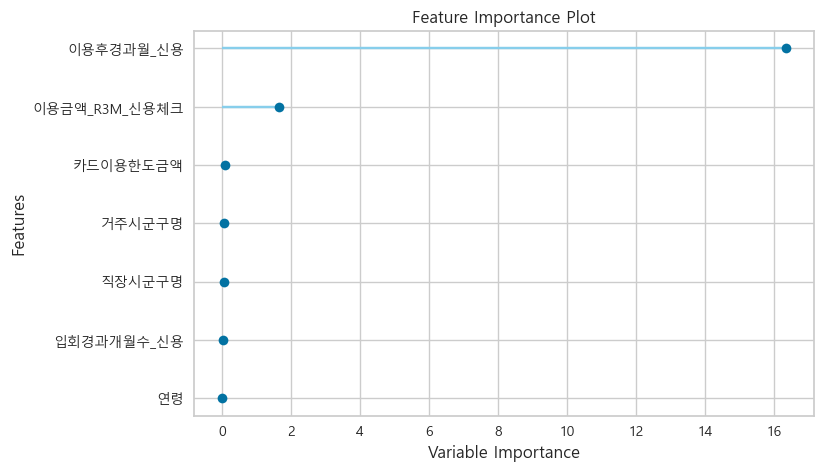

In [44]:
plot_model(model[0], plot = 'feature')

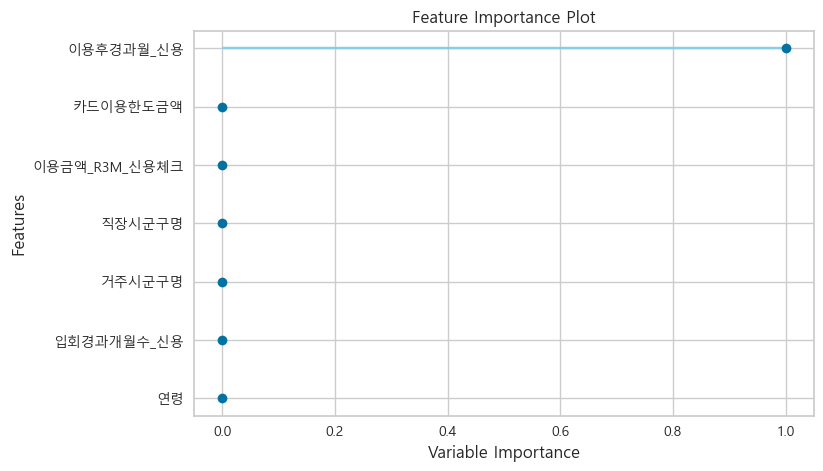

In [45]:
plot_model(model[2], plot = 'feature')

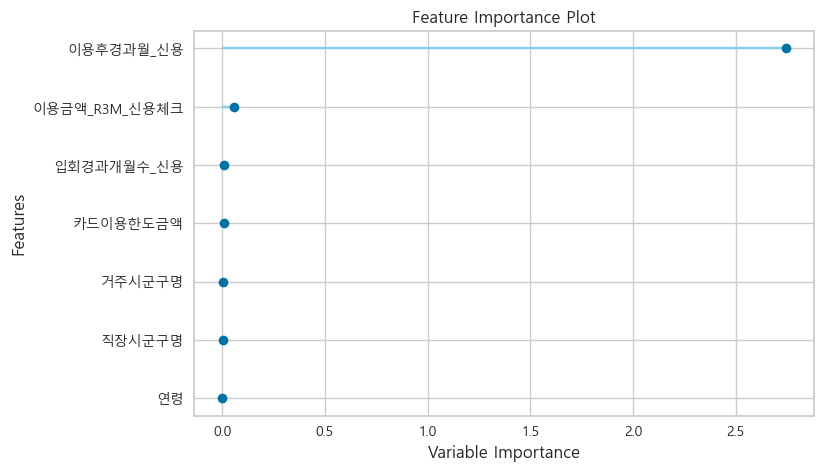

In [46]:
plot_model(model[3], plot = 'feature')

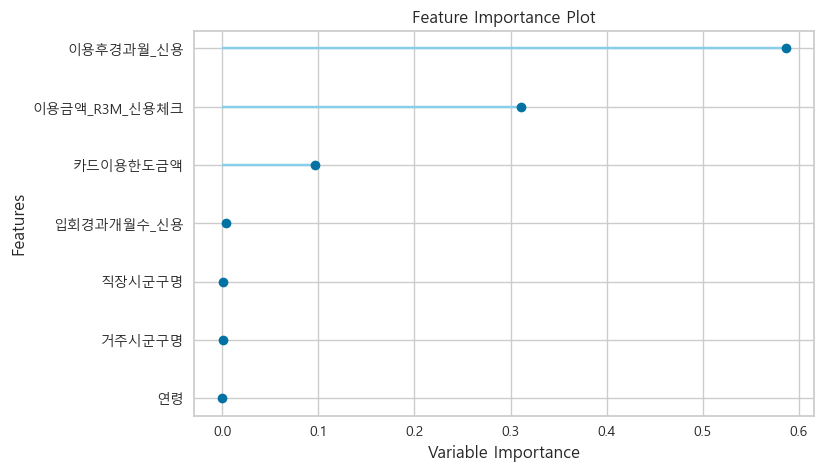

In [47]:
plot_model(model[4], plot = 'feature')

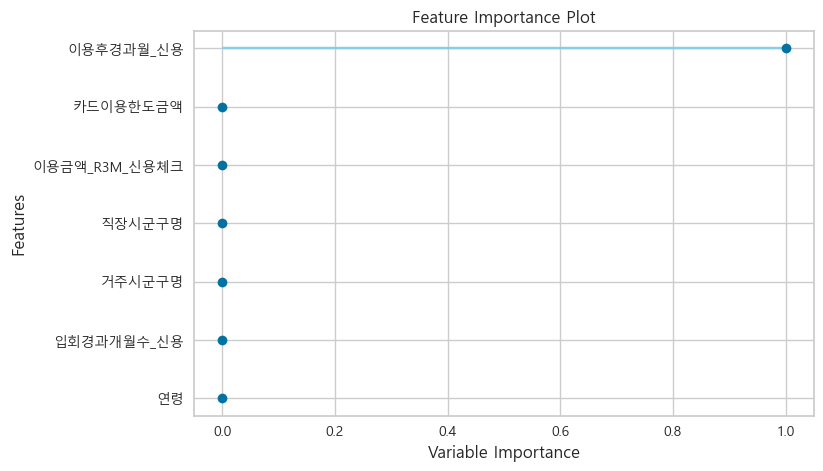

In [49]:
plot_model(model[6], plot = 'feature')

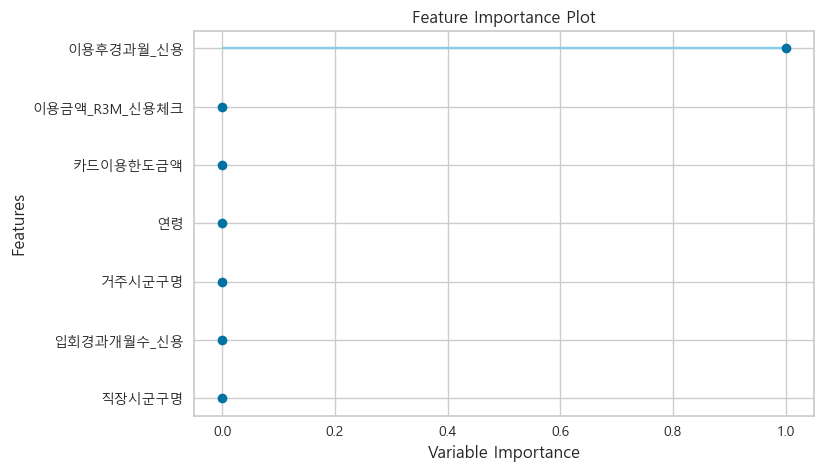

In [50]:
plot_model(model[7], plot = 'feature')

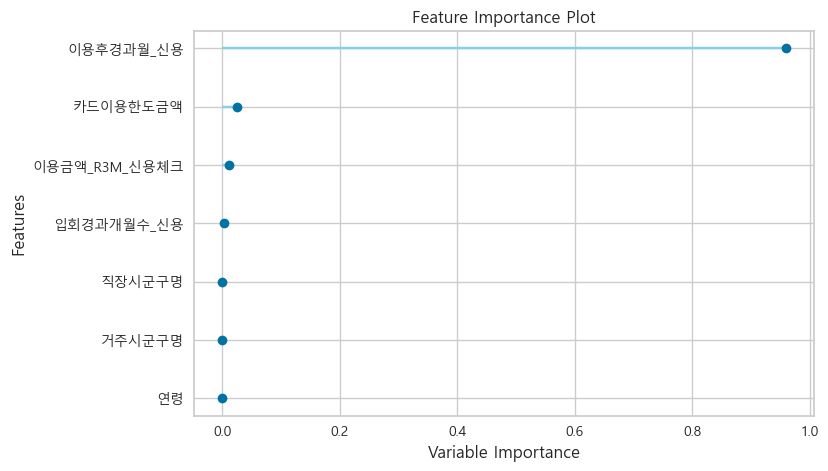

In [51]:
plot_model(model[8], plot = 'feature')

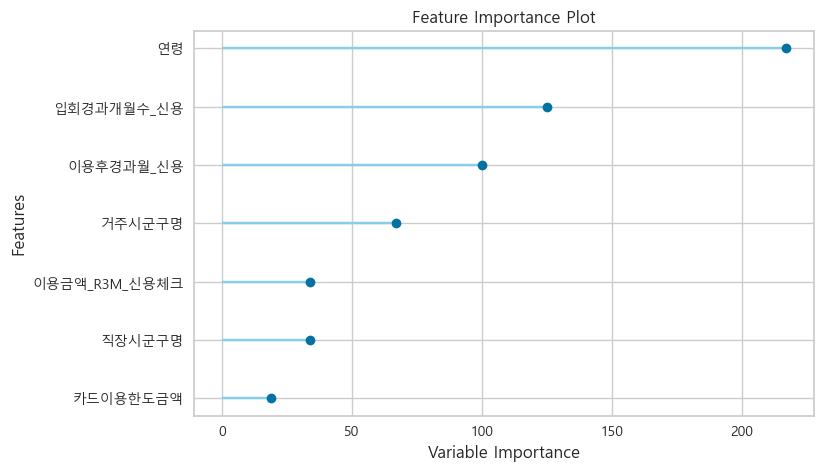

In [52]:
plot_model(model[9], plot = 'feature')

## 통계분석 해보기

In [63]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr, bartlett, levene, wilcoxon, mannwhitneyu, ttest_ind, f_oneway, kruskal
from scipy.stats import shapiro, anderson, kstest, normaltest, jarque_bera
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.outliers_influence import variance_inflation_factor
from typing import Iterable, Union

In [69]:
# 고객구분의 Active와 Dormancy의 '이용후경과월_신용' 중앙값들을 직접 비교
for group_name, group in x.groupby(by = ['고객구분'])[['이용후경과월_신용']]:
    print(f'Column Name : {group_name},   Mean : {group.median()}')

Column Name : Active,   Mean : 이용후경과월_신용    0.0
dtype: float64
Column Name : Dormancy,   Mean : 이용후경과월_신용    12.0
dtype: float64


In [70]:
# 고객구분의 Active와 Dormancy의 '이용금액_R3M_신용체크' 중앙값들을 직접 비교
for group_name, group in x.groupby(by = ['고객구분'])[['이용금액_R3M_신용체크']]:
    print(f'Column Name : {group_name},   Mean : {group.median()}')

Column Name : Active,   Mean : 이용금액_R3M_신용체크    1558558.5
dtype: float64
Column Name : Dormancy,   Mean : 이용금액_R3M_신용체크    0.0
dtype: float64


In [65]:
check_columns = column_list
nondifferent_columns = []
different_columns = []

for column in check_columns:
  # 1. 정규성 검정
  # shapiro나 kolmogorov-smirnov 같은 검정방법은 데이터의 갯수에 따라 달라지므로 데이터 갯수에 상관없이 하기 위해 normaltest로 검정
  normally = []
  cs_tv, cs_pv = normaltest(df.loc[df['고객구분'] == '21.Active_연속', column].reset_index(drop = True))
  if cs_pv > 0.05:
    normally.append(True)
  else:
    normally.append(False)
  tf_tv, tf_pv = normaltest(df.loc[df['고객구분'] == '22.Active_간헐', column].reset_index(drop = True))
  if tf_pv > 0.05:
    normally.append(True)
  else:
    normally.append(False)

  # 정규성인지 아닌지에 따라 등분산분석 할지 정하기
  if all(normally):
    # 2. 등분산성 분석
    # 정규성 검정을 통해 정규 분포를 따른다는 귀무가설을 채택했으므로 정규분포에서 더 정확한 barlett 등분산검정을 사용
    bartlett_tv, bartlett_pv = bartlett(df.loc[df['고객구분'] == '21.Active_연속', column].reset_index(drop = True), df.loc[df['고객구분'] == '22.Active_간헐', column].reset_index(drop = True))
    if bartlett_pv > 0.05:
      ttest_tv, ttest_pv = ttest_ind(df.loc[df['고객구분'] == '21.Active_연속', column].reset_index(drop = True), df.loc[df['고객구분'] == '22.Active_간헐', column].reset_index(drop = True), equal_var = True, alternative = 'two-sided')
    else:
      ttest_tv, ttest_pv = ttest_ind(df.loc[df['고객구분'] == '21.Active_연속', column].reset_index(drop = True), df.loc[df['고객구분'] == '22.Active_간헐', column].reset_index(drop = True), equal_var = False, alternative = 'two-sided')
    if ttest_pv < 0.05:
      print(column, ' : ', f't-test p-value = {ttest_pv}')
      different_columns.append(column)
    else:
      print(column, ' : ', f't-test p-value = {ttest_pv}')
      nondifferent_columns.append(column)
  else:
    # normaltest P-value가 0.05보다 작으면 정규성을 가지지 않으므로 mannwhitneyu 검정으로 중위수 차이에 대한 검정
    mannwhitneyu_tv, mannwhitneyu_pv = mannwhitneyu(df.loc[df['고객구분'] == '21.Active_연속', column].reset_index(drop = True), df.loc[df['고객구분'] == '22.Active_간헐', column].reset_index(drop = True), alternative = 'two-sided')
    # mannwhitneyu P-value가 0.05보다 작으면 중위수 차이가 있으므로 출력
    if mannwhitneyu_pv < 0.05:
      print(column, ' : ', f'mannwhitneyu p-value  = {mannwhitneyu_pv}')
      different_columns.append(column)
    else:
      print(column, ' : ', f'mannwhitneyu p-value  = {mannwhitneyu_pv}')
      nondifferent_columns.append(column)



print('Different_Columns', different_columns)
print('NonDifferent_Columns', nondifferent_columns)

이용금액_여유생활  :  mannwhitneyu p-value  = 0.0
이용금액_사교활동  :  mannwhitneyu p-value  = 0.0
이용금액_일상생활  :  mannwhitneyu p-value  = 0.0
이용금액_해외  :  mannwhitneyu p-value  = 4.345235698487688e-204
쇼핑_도소매_이용금액  :  mannwhitneyu p-value  = 0.0
쇼핑_백화점_이용금액  :  mannwhitneyu p-value  = 0.0
쇼핑_마트_이용금액  :  mannwhitneyu p-value  = 0.0
쇼핑_슈퍼마켓_이용금액  :  mannwhitneyu p-value  = 0.0
쇼핑_편의점_이용금액  :  mannwhitneyu p-value  = 0.0
쇼핑_아울렛_이용금액  :  mannwhitneyu p-value  = 0.0
쇼핑_온라인_이용금액  :  mannwhitneyu p-value  = 0.0
쇼핑_기타_이용금액  :  mannwhitneyu p-value  = 0.0
쇼핑_전체_이용금액  :  mannwhitneyu p-value  = 0.0
교통_주유이용금액  :  mannwhitneyu p-value  = 0.0
교통_정비이용금액  :  mannwhitneyu p-value  = 0.0
교통_통행료이용금액  :  mannwhitneyu p-value  = 5.607512236265225e-71
교통_버스지하철이용금액  :  mannwhitneyu p-value  = 0.0
교통_택시이용금액  :  mannwhitneyu p-value  = 0.0
교통_철도버스이용금액  :  mannwhitneyu p-value  = 0.0
교통_전체이용금액  :  mannwhitneyu p-value  = 0.0
여유_운동이용금액  :  mannwhitneyu p-value  = 0.0
여유_Pet이용금액  :  mannwhitneyu p-value  = 6.163422052045598e-276

In [70]:
df.loc[df['고객구분'] == '21.Active_연속', '이용금액_여유생활'].median()

0.0

In [71]:
df.loc[df['고객구분'] == '22.Active_간헐', '이용금액_여유생활'].median()

0.0

In [74]:
df.loc[df['고객구분'] == '21.Active_연속', '이용금액_여유생활'].value_counts(normalize = True)

0          0.586970
10000      0.005865
20000      0.005770
30000      0.004532
12000      0.004056
             ...   
2866400    0.000004
223470     0.000004
1776700    0.000004
830300     0.000004
311040     0.000004
Name: 이용금액_여유생활, Length: 17845, dtype: float64

In [75]:
df.loc[df['고객구분'] == '22.Active_간헐', '이용금액_여유생활'].value_counts(normalize = True)

0          0.868159
10000      0.002618
20000      0.002308
30000      0.001860
15000      0.001688
             ...   
362400     0.000034
398600     0.000034
155550     0.000034
2271000    0.000034
64800      0.000034
Name: 이용금액_여유생활, Length: 1704, dtype: float64